#Proyecto Final Bedu M√≥dulo 4: An√°lisis de datos con Python

### Equipo 11:
- Armando Sanchez
- Carlos Brice√±o
- Ferm√≠n Ram√≠rez R√≠os
- Gerardo Ascencio
- Marisol Flores Castro
- Miguel Angel Garibay Cocco
***

###Antecedentes
El dataset que tenemos surge a partir los Datos Abiertos de la Direcci√≥n General de Epidemiolog√≠a de la Secretar√≠a de Salud referente al COVID-19 https://www.gob.mx/salud/documentos/datos-abiertos-152127

Se trata de un archivo en formato csv que contiene **3 millones de registros** con fecha de corte al **28 de febrero de 2023**.

Con lo cual se pretende analizar las variables num√©ricas, sin embargo, la mayor√≠a de las variables son categ√≥ricas y el desglose est√° a nivel de persona, por lo que para los ejercicios de este m√≥dulo vamos a obtener subconjuntos con agrupaciones sobre algunas variables para poder realizar los an√°lisis correspondientes.



In [ ]:
#se importan todas las bibliotecas necesarias para todo el proyecto
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/proyectoBedu_python/modulo4/dataset3M_covid2022.csv", low_memory=False)
df = pd.read_csv('/content/drive/MyDrive/dataset3M_covid2022.csv', low_memory=False)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

FECHA_ACTUALIZACION ID_REGISTRO  ORIGEN  SECTOR  ENTIDAD_UM  SEXO  \
0          2023-02-28      0793b8       2      12           9     2   
1          2023-02-28      06fce8       1      12           7     1   
2          2023-02-28      1933c0       1      12           9     2   
3          2023-02-28      180725       2       9           9     2   
4          2023-02-28      04583b       1       6           5     1   

   ENTIDAD_NAC  ENTIDAD_RES  MUNICIPIO_RES  TIPO_PACIENTE FECHA_INGRESO  \
0            9            9             10              1    2022-05-03   
1            7            7             59              1    2022-03-05   
2            9            9              7              1    2022-03-09   
3            9            9             12              2    2022-01-19   
4            5            5             28              1    2022-06-20   

  FECHA_SINTOMAS   FECHA_DEF  INTUBADO  NEUMONIA  EDAD  NACIONALIDAD  \
0     2022-05-03  9999-99-99        97         2    43             1   
1     2022-03-05  9999-99-99        97         2    35             1   
2     2022-03-09  9999-99-99        97         2    27             1   
3     2022-01-17  9999-99-99         2         2    33             1   
4     2022-06-17  9999-99-99        97         2    42             1   

   EMBARAZO  HABLA_LENGUA_INDIG  INDIGENA  DIABETES  EPOC  ASMA  INMUSUPR  \
0        97                   2         2         2     2     2         2   
1        98                   2         2         2     2     2         2   
2        97                   2         2         2     2     2         2   
3        97                   2         2         2     2     2         2   
4         2                  99        99         2     2     2         2   

   HIPERTENSION  OTRA_COM  CARDIOVASCULAR  OBESIDAD  RENAL_CRONICA  \
0             2         2               2         2              2   
1             2         2               2         2              2   
2             2         2               2         2              2   
3             2         2               2         2              2   
4             2         2               2         2              2   

   TABAQUISMO  OTRO_CASO  TOMA_MUESTRA_LAB  RESULTADO_LAB  \
0           1          2                 2             97   
1           2          2                 2             97   
2           2          2                 2             97   
3           2          2                 2             97   
4           2          2                 2             97   

   TOMA_MUESTRA_ANTIGENO  RESULTADO_ANTIGENO  CLASIFICACION_FINAL  MIGRANTE  \
0                      1                   2                    7        99   
1                      1                   2                    7        99   
2                      1                   2                    7        99   
3                      1                   2                    7        99   
4                      1                   2                    7        99   

  PAIS_NACIONALIDAD PAIS_ORIGEN  UCI  
0            M√©xico          97   97  
1            M√©xico          97   97  
2            M√©xico          97   97  
3            M√©xico          97    2  
4            M√©xico          97   97

##An√°lisis Exploratorio de los datos
Del dataset, se observan las variables y se hace un analisis exploratorio de los datos. Tenemos un dataset de 3 millones de registros y 40 columnas

In [ ]:
df.shape

(3000000, 40)

In [ ]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUSUP

In [ ]:
df.sample(10)

FECHA_ACTUALIZACION ID_REGISTRO  ORIGEN  SECTOR  ENTIDAD_UM  SEXO  \
747686           2023-02-28      4abfc9       2       4          18     2   
1013736          2023-02-28      6bf94c       2      12           3     1   
816353           2023-02-28      894b85       2      12          27     1   
2788123          2023-02-28     g1cb8df       1      12          19     2   
1369681          2023-02-28      6be613       2      12           9     2   
307751           2023-02-28      b7dc31       2      12           9     1   
1432425          2023-02-28      56f19d       1       8           9     2   
2478433          2023-02-28     gz3bbf4       2       9           9     2   
2949018          2023-02-28     g089d05       2      12           9     2   
1154537          2023-02-28      e7fdf0       2       4          19     1   

         ENTIDAD_NAC  ENTIDAD_RES  MUNICIPIO_RES  TIPO_PACIENTE FECHA_INGRESO  \
747686            15           18             20              1    2022-01-10   
1013736            3            3              3              1    2022-01-21   
816353            27           27             15              1    2022-01-18   
2788123           19           19             46              1    2022-03-22   
1369681            9            9             10              1    2022-01-28   
307751            15            9             12              1    2022-01-11   
1432425            9            9             12              1    2022-01-29   
2478433            9            9             14              1    2022-02-28   
2949018            9            9             17              1    2022-04-07   
1154537           19           19             25              1    2022-01-07   

        FECHA_SINTOMAS   FECHA_DEF  INTUBADO  NEUMONIA  EDAD  NACIONALIDAD  \
747686      2022-01-07  9999-99-99        97         2    27             1   
1013736     2022-01-18  9999-99-99        97         2    42             1   
816353      2022-01-15  9999-99-99        97         2    30             1   
2788123     2022-03-21  9999-99-99        97         2    25             1   
1369681     2022-01-28  9999-99-99        97         2    54             1   
307751      2022-01-03  9999-99-99        97         2    32             1   
1432425     2022-01-28  9999-99-99        97         2    34             1   
2478433     2022-02-27  9999-99-99        97         2    70             1   
2949018     2022-04-07  9999-99-99        97         2    20             1   
1154537     2022-01-04  9999-99-99        97         2    38             1   

         EMBARAZO  HABLA_LENGUA_INDIG  INDIGENA  DIABETES  EPOC  ASMA  \
747686         97                   2         2         2     2     2   
1013736         2                   2         2         2     2     2   
816353          2                  99         2         2     2     2   
2788123        97                   2         2         2     2     2   
1369681        97                   2         2         2     2     2   
307751          2                   2         2         2     2     2   
1432425        97                   2         2         2     2     2   
2478433        97                   2         2         2     2     2   
2949018        97                   2         2         2     2     2   
1154537         2                   2         2         2     2     2   

         INMUSUPR  HIPERTENSION  OTRA_COM  CARDIOVASCULAR  OBESIDAD  \
747686          2             2         2               2         2   
1013736         2             2         2               2         2   
816353          2             2         2               2         2   
2788123         2             2         2               2         2   
1369681         2             2         2               2         2   
307751          2             2         2               2         2   
1432425         2             2         2               2         1   
2478433         1             2      

####Actualizaci√≥n de variables
Dado que hay variables categ√≥ricas que tienen valor de c√≥digo entero, se procede a reemplazar los valores por su correpondiente en el cat√°logo de variables, las que nos interesan para el estudio ser√°n SECTOR, RESULTADO_ANTIGENO Y SEXO.

In [ ]:
df['SECTOR'] = df['SECTOR'].replace(1, 'CRUZ ROJA')
df['SECTOR'] = df['SECTOR'].replace(2, 'DIF')
df['SECTOR'] = df['SECTOR'].replace(3, 'ESTATAL')
df['SECTOR'] = df['SECTOR'].replace(4, 'IMSS')
df['SECTOR'] = df['SECTOR'].replace(5, 'IMSS-BIENESTAR')
df['SECTOR'] = df['SECTOR'].replace(6, 'ISSSTE')
df['SECTOR'] = df['SECTOR'].replace(7, 'MUNICIPAL')
df['SECTOR'] = df['SECTOR'].replace(8, 'PEMEX')
df['SECTOR'] = df['SECTOR'].replace(9, 'PRIVADA')
df['SECTOR'] = df['SECTOR'].replace(10, 'SEDENA')
df['SECTOR'] = df['SECTOR'].replace(11, 'SEMAR')
df['SECTOR'] = df['SECTOR'].replace(12, 'SSA')
df['SECTOR'] = df['SECTOR'].replace(13, 'UNIVERSITARIO')
df['SECTOR'] = df['SECTOR'].replace(99, 'NO ESPECIFICADO')

In [ ]:
df['RESULTADO_ANTIGENO'] = df['RESULTADO_ANTIGENO'].replace(1, 'POSITIVO A SARS-COV-2')
df['RESULTADO_ANTIGENO'] = df['RESULTADO_ANTIGENO'].replace(2, 'NEGATIVO A SARS-COV-2')
df['RESULTADO_ANTIGENO'] = df['RESULTADO_ANTIGENO'].replace(97, 'NO APLICA (CASO SIN MUESTRA)')

In [ ]:
df['SEXO'] = df['SEXO'].replace(1, 'Mujer')
df['SEXO'] = df['SEXO'].replace(2, 'Hombre')

###Extracci√≥n de subconjuntos
Se extrae un subconjunto de los datos para calcular los estimados de locaci√≥n
Para este ejercicio, se toma la variable categ√≥rica CLASIFICACION_FINAL para filtrar s√≥lo los **casos confirmados por Covid**, y de los cuales se obtiene el conjunto de edades de los pacientes que estuvieron contagiados, as√≠ como otros indicadores como las comorbilidades que padecieron los pacientes por cada entidad

In [ ]:
df_covid = df.query("CLASIFICACION_FINAL==1 | CLASIFICACION_FINAL==2 | CLASIFICACION_FINAL==3")[['FECHA_ACTUALIZACION','ID_REGISTRO','EDAD','SEXO','CLASIFICACION_FINAL','SECTOR','RESULTADO_ANTIGENO','ENTIDAD_UM','ENTIDAD_NAC','ENTIDAD_RES']]
df_covid

FECHA_ACTUALIZACION ID_REGISTRO  EDAD    SEXO  CLASIFICACION_FINAL  \
7                2023-02-28      198b54    58  Hombre                    3   
15               2023-02-28      045408    34   Mujer                    3   
20               2023-02-28      1d1a67    24   Mujer                    3   
22               2023-02-28      0741e4    54  Hombre                    2   
27               2023-02-28      0fef08    39  Hombre                    3   
...                     ...         ...   ...     ...                  ...   
2999995          2023-02-28     g130cc6    27  Hombre                    3   
2999996          2023-02-28     g171cd3    54  Hombre                    3   
2999997          2023-02-28     g1dabee    35   Mujer                    3   
2999998          2023-02-28     g16ef95    25  Hombre                    3   
2999999          2023-02-28     g11ef86    67   Mujer                    3   

         SECTOR            RESULTADO_ANTIGENO  ENTIDAD_UM  ENTIDAD_NAC  \
7           SSA  NO APLICA (CASO SIN MUESTRA)           5           10   
15          SSA         NEGATIVO A SARS-COV-2          22           22   
20          SSA         POSITIVO A SARS-COV-2          18           18   
22       ISSSTE  NO APLICA (CASO SIN MUESTRA)           9            9   
27          SSA  NO APLICA (CASO SIN MUESTRA)           9            9   
...         ...                           ...         ...          ...   
2999995    IMSS         POSITIVO A SARS-COV-2          21           21   
2999996    IMSS         POSITIVO A SARS-COV-2           2           26   
2999997    IMSS         POSITIVO A SARS-COV-2           8            8   
2999998    IMSS         POSITIVO A SARS-COV-2          20           20   
2999999    IMSS         POSITIVO A SARS-COV-2           9           26   

         ENTIDAD_RES  
7                  5  
15                22  
20                18  
22                 9  
27                 9  
...              ...  
2999995           21  
2999996            2  
2999997            8  
2999998           20  
2999999            9  

[1636137 rows x 10 columns]

Para hacer un constraste de los datos, tambi√©n obtenemos los valores para los pacientes que no ten√≠an COVID

In [ ]:
df_nocovid = df.query("CLASIFICACION_FINAL==7")[['FECHA_ACTUALIZACION','ID_REGISTRO','EDAD','SEXO','CLASIFICACION_FINAL','SECTOR','RESULTADO_ANTIGENO','ENTIDAD_UM','ENTIDAD_NAC','ENTIDAD_RES']]
df_nocovid

FECHA_ACTUALIZACION ID_REGISTRO  EDAD    SEXO  CLASIFICACION_FINAL  \
0                2023-02-28      0793b8    43  Hombre                    7   
1                2023-02-28      06fce8    35   Mujer                    7   
2                2023-02-28      1933c0    27  Hombre                    7   
3                2023-02-28      180725    33  Hombre                    7   
4                2023-02-28      04583b    42   Mujer                    7   
...                     ...         ...   ...     ...                  ...   
2999897          2023-02-28     g101eed    54   Mujer                    7   
2999898          2023-02-28     g19b455    37   Mujer                    7   
2999899          2023-02-28     g0f3082    28  Hombre                    7   
2999900          2023-02-28     g0d4a8e    39   Mujer                    7   
2999901          2023-02-28     g0ef2a4    13  Hombre                    7   

          SECTOR     RESULTADO_ANTIGENO  ENTIDAD_UM  ENTIDAD_NAC  ENTIDAD_RES  
0            SSA  NEGATIVO A SARS-COV-2           9            9            9  
1            SSA  NEGATIVO A SARS-COV-2           7            7            7  
2            SSA  NEGATIVO A SARS-COV-2           9            9            9  
3        PRIVADA  NEGATIVO A SARS-COV-2           9            9            9  
4         ISSSTE  NEGATIVO A SARS-COV-2           5            5            5  
...          ...                    ...         ...          ...          ...  
2999897      SSA  NEGATIVO A SARS-COV-2          15           15           15  
2999898      SSA  NEGATIVO A SARS-COV-2          15           15           15  
2999899      SSA  NEGATIVO A SARS-COV-2           2           29            2  
2999900  PRIVADA  NEGATIVO A SARS-COV-2          24           24           24  
2999901  PRIVADA  NEGATIVO A SARS-COV-2          24           24           24  

[1289007 rows x 10 columns]

###Generaci√≥n de variables
Para calcular las medidas de locaci√≥n, generamos algunas variables como edades, edades de pacientes SIN COVID y edades para mujeres y hombres con COVID

In [ ]:
edades = df_covid['EDAD']
edades_nocovid = df_nocovid['EDAD']
edades_mujeres = df_covid.query("SEXO=='Mujer'")['EDAD']
edades_hombres = df_covid.query("SEXO=='Hombre'")['EDAD']

Obtenemos m√°ximos y m√≠nimos para darnos una idea del rango

In [ ]:
print(f'Valor m√≠nimo de edades de pacientes con COVID: {edades.min()}')
print(f'Valor m√°ximo de edades de pacientes con COVID: {edades.max()}')


Valor m√≠nimo de edades de pacientes con COVID: 0
Valor m√°ximo de edades de pacientes con COVID: 122


In [ ]:
print(f'Valor m√≠nimo de edades de pacientes SIN COVID: {edades_nocovid.min()}')
print(f'Valor m√°ximo de edades de pacientes SIN COVID: {edades_nocovid.max()}')
edades_nocovid.max()

Valor m√≠nimo de edades de pacientes SIN COVID: 0
Valor m√°ximo de edades de pacientes SIN COVID: 122


122

In [ ]:
print(f'Valor m√≠nimo de edades de mujeres con COVID: {edades_mujeres.min()}')
print(f'Valor m√°ximo de edades de mujeres con COVID: {edades_mujeres.max()}')
print(f'Valor m√≠nimo de edades de hombres con COVID: {edades_hombres.min()}')
print(f'Valor m√°ximo de edades de hombres con COVID: {edades_hombres.max()}')

Valor m√≠nimo de edades de mujeres con COVID: 0
Valor m√°ximo de edades de mujeres con COVID: 122
Valor m√≠nimo de edades de hombres con COVID: 0
Valor m√°ximo de edades de hombres con COVID: 122


#Postwork 1: Obteniendo estimados de locaci√≥n y variabilidad
Vamos a usar estimados de locaci√≥n y variabilidad para describir nuestro dataset, en este caso, obtenemos el subconjunto de todos los pacientes **confirmados de COVID** y comenzamos por analizar las variables de EDAD y SEXO para obtener las medidas de locaci√≥n:<br>
a) Promedio <br>
b) Mediana <br>
c) Media Truncada <br>
d) Desviaci√≥n est√°ndar <br>
e) Rango <br>
f) Percentiles 25 y 75 (por lo menos) <br>
g) Rango intercuartil


###**a) Promedio**
El promedio de las edades de los pacientes con COVID es de 38 a√±os

In [ ]:
print(f'Valor promedio de edades de todos los pacientes con COVID: {edades.mean()}')
print(f'Valor promedio de edades de mujeres con COVID: {edades_mujeres.mean()}')
print(f'Valor promedio de edades de hombres con COVID: {edades_hombres.mean()}')


Valor promedio de edades de todos los pacientes con COVID: 38.26994316490612
Valor promedio de edades de mujeres con COVID: 38.43908399375064
Valor promedio de edades de hombres con COVID: 38.053807482566064


###**b) Mediana**
La mediana de las edades de los pacientes con COVID y de mujeres es de 37, mientras que para los hombres es de 36, lo que indica que podemos tener casos at√≠picos como la edad de 122 a√±os que indica el m√°ximo

In [ ]:
print(f'La mediana de edades de todos los pacientes con COVID: {edades.median()}')
print(f'La mediana de edades de mujeres con COVID: {edades_mujeres.median()}')
print(f'La mediana de edades de hombres con COVID: {edades_hombres.median()}')

La mediana de edades de todos los pacientes con COVID: 37.0
La mediana de edades de mujeres con COVID: 37.0
La mediana de edades de hombres con COVID: 36.0


###**c)Media Truncada**
Para quitar los valores at√≠picos, calculamos la media truncada con un 5%, y efectivamente podemos comprobar que el resultado se acerca m√°s a la mediana por lo que existen algunos valores at√≠picos en la edad de los pacientes, hombres y mujeres

In [ ]:
print(f'La media truncada de edades de todos los pacientes con COVID: {stats.trim_mean(edades, 0.05)}')
print(f'La media truncada de edades de mujeres con COVID: {stats.trim_mean(edades_mujeres, 0.05)}')
print(f'La media truncada de edades de hombres con COVID: {stats.trim_mean(edades_hombres, 0.05)}')

La media truncada de edades de todos los pacientes con COVID: 37.866561178927356
La media truncada de edades de mujeres con COVID: 38.07346592903749
La media truncada de edades de hombres con COVID: 37.598194769937585


###**d) Desviaci√≥n Est√°ndar**
Obtenenos la desviaci√≥n est√°ndar para ver qu√© tan dispersos y alejados est√°n los datos de la media

In [ ]:
print(f'La desviaci√≥n est√°ndar de edades de todos los pacientes con COVID: {edades.std()}')
print(f'La desviaci√≥n est√°ndar de edades de mujeres con COVID: {edades_mujeres.std()}')
print(f'La desviaci√≥n est√°ndar de edades de hombres con COVID: {edades_hombres.std()}')


La desviaci√≥n est√°ndar de edades de todos los pacientes con COVID: 15.655174323149904
La desviaci√≥n est√°ndar de edades de mujeres con COVID: 15.12007179295727
La desviaci√≥n est√°ndar de edades de hombres con COVID: 16.310885624124573


###**e) Rango**
El rango lo obtenemos de la diferencia entre el valor m√°ximo y el m√≠nimo

In [ ]:
print(f'El rango de edades de todos los pacientes con COVID: {edades.max() - edades.min()}')
print(f'El rango de edades de mujeres con COVID: {edades_mujeres.max() - edades_mujeres.min()}')
print(f'El rango de edades de hombres con COVID: {edades_hombres.max() - edades_hombres.min()}')


El rango de edades de todos los pacientes con COVID: 122
El rango de edades de mujeres con COVID: 122
El rango de edades de hombres con COVID: 122


###**f) Percentiles 25 y 75 (por lo menos)**
Obtenemos los percentiles para todos los pacientes y para hombres y mujeres por separado (todos con COVID)

In [ ]:
print("Percentiles para los pacientes con COVID")
print(f'Valor m√≠nimo: {edades.min()}')
print(f'Percentil 10: {edades.quantile(0.1)}')
print(f'Percentil 25: {edades.quantile(0.25)}')
print(f'Percentil 50: {edades.median()}')
print(f'Percentil 75: {edades.quantile(0.75)}')
print(f'Percentil 90: {edades.quantile(0.9)}')
print(f'Valor m√°ximo: {edades.max()}')

Percentiles para los pacientes con COVID
Valor m√≠nimo: 0
Percentil 10: 21.0
Percentil 25: 27.0
Percentil 50: 37.0
Percentil 75: 48.0
Percentil 90: 58.0
Valor m√°ximo: 122


In [ ]:
print("Percentiles para las mujeres con COVID")
print(f'Valor m√≠nimo: {edades_mujeres.min()}')
print(f'Percentil 10: {edades_mujeres.quantile(0.1)}')
print(f'Percentil 25: {edades_mujeres.quantile(0.25)}')
print(f'Percentil 50: {edades_mujeres.median()}')
print(f'Percentil 75: {edades_mujeres.quantile(0.75)}')
print(f'Percentil 90: {edades_mujeres.quantile(0.9)}')
print(f'Valor m√°ximo: {edades_mujeres.max()}')

Percentiles para las mujeres con COVID
Valor m√≠nimo: 0
Percentil 10: 21.0
Percentil 25: 28.0
Percentil 50: 37.0
Percentil 75: 48.0
Percentil 90: 58.0
Valor m√°ximo: 122


In [ ]:
print("Percentiles para los hombres con COVID")
print(f'Valor m√≠nimo: {edades_hombres.min()}')
print(f'Percentil 10: {edades_hombres.quantile(0.1)}')
print(f'Percentil 25: {edades_hombres.quantile(0.25)}')
print(f'Percentil 50: {edades_hombres.median()}')
print(f'Percentil 75: {edades_hombres.quantile(0.75)}')
print(f'Percentil 90: {edades_hombres.quantile(0.9)}')
print(f'Valor m√°ximo: {edades_hombres.max()}')

Percentiles para los hombres con COVID
Valor m√≠nimo: 0
Percentil 10: 20.0
Percentil 25: 27.0
Percentil 50: 36.0
Percentil 75: 49.0
Percentil 90: 59.0
Valor m√°ximo: 122


Viendo estos n√∫meros podemos inferir varias cosas:

Casi todos los pacientes tienen menos de 60 a√±os.
Eso quiere decir que tenemos algunos valores at√≠picos demasiado grandes (si los comparamos con el resto de los valores)
La mediana nos estaba dando un n√∫mero m√°s cercano al verdadero "valor t√≠pico" que es el promedio.
El promedio ten√≠a un sesgo hacia arriba debido a los valores grandes.
El rango entre el valor m√°ximo y m√≠nimo no nos da una medida representativa de qu√© valores pueden tomar nuestros datos.

###**g) Rango Intercuart√≠lico**


In [ ]:
print(f'Rango intercuart√≠lico de todos los pacientes: {edades.quantile(0.75) - edades.quantile(0.25)}')
print(f'Rango intercuart√≠lico de las mujeres: {edades_mujeres.quantile(0.75) - edades_mujeres.quantile(0.25)}')
print(f'Rango intercuart√≠lico de los hombres: {edades_hombres.quantile(0.75) - edades_hombres.quantile(0.25)}')

Rango intercuart√≠lico de todos los pacientes: 21.0
Rango intercuart√≠lico de las mujeres: 20.0
Rango intercuart√≠lico de los hombres: 22.0


#Postwork 2: Introducci√≥n a la visualizaci√≥n de datos: Distribuciones
En este postwork vamos a explorar las distribuciones de las variables num√©ricas que tengamos en nuestro dataset, en nuestro caso nos enfocamos en la edad de todos los pacientes, hombres y mujeres, con COVID

In [ ]:
sns.set(style="whitegrid")

###**BoxPlots**

Obtenemos la gr√°fica boxplot de las edades de los pacientes con COVID

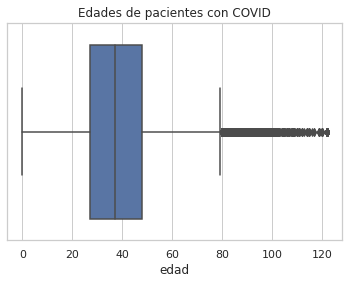

In [ ]:
ax=sns.boxplot(x=edades)
ax.set(title='Edades de pacientes con COVID', xlabel='edad');

Como se puede observar en la gr√°fica, los datos est√°n concentrados en valores menores a 50 a√±os y que las edades muy altas son anomal√≠as en nuestro conjunto.
Sabemos que, dentro del rango total de los datos, tenemos una distribuci√≥n que tiende hacia los valores m√°s peque√±os.
Tambi√©n sabemos que nuestros datos en general est√°n muy concentrados (o sea, poco dispersos), pero que hay una "colita" de datos hacia la derecha que se extiende bastante lejos.

Ahora graficamos las edades de las mujeres con COVID, y observamos el mismo comportamiento que con todos los pacientes, los valores est√°n concentrado en valores menores a 50 a√±os, y las edades muy altas son valores at√≠picos.

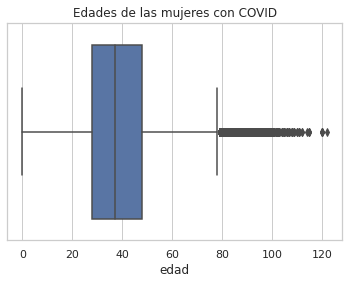

In [ ]:
ax=sns.boxplot(x=edades_mujeres)
ax.set(title='Edades de las mujeres con COVID', xlabel='edad');

Ahora graficamos las edades de los hombres con COVID y obervamos algo similar que el caso con las mujeres, lo datos se concentran en los valores menores a 50 a√±os y existen valores at√≠picos.

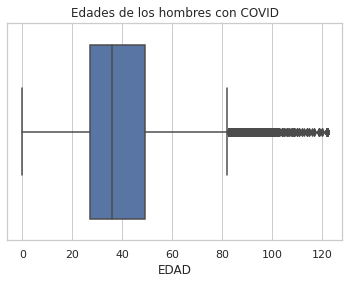

In [ ]:
ax=sns.boxplot(x=edades_hombres)
ax.set(title='Edades de los hombres con COVID');

Ahora graficamos la l√≠nea que muestra la mediana en el boxplot y vemos que efectivamente est√° muy cerca de la media, en las tres variables

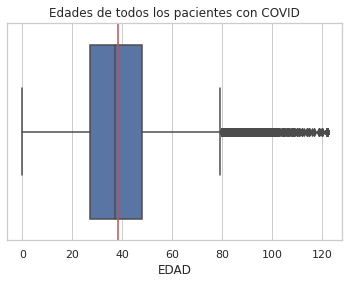

In [ ]:
ax=sns.boxplot(x=edades)
ax.set(title ='Edades de todos los pacientes con COVID')
plt.axvline(edades.mean(), c='r');

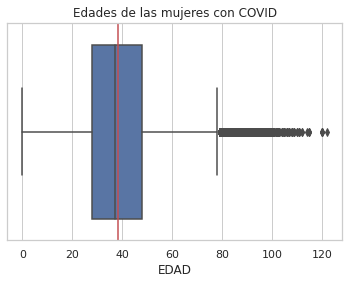

In [ ]:
ax=sns.boxplot(x=edades_mujeres)
ax.set(title ='Edades de las mujeres con COVID')
plt.axvline(edades_mujeres.mean(), c='r');

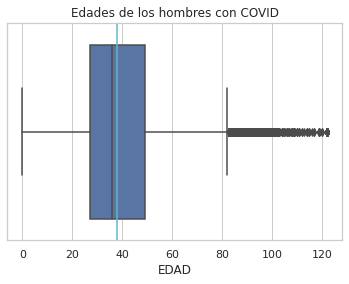

In [ ]:
ax=sns.boxplot(x=edades_hombres)
ax.set(title ='Edades de los hombres con COVID')
plt.axvline(edades_hombres.mean(), c='c');

###**Rango Intercuart√≠lico y valores at√≠picos**
Vamos a utilizar la medida que utiliza el boxplot para limitar el tama√±o de los bigotes y filtrar todos los datos que excedan ese l√≠mite a trav√©s del Score de Rango Intercuart√≠lico (IQR-Score). De esa manera estamos filtrando los valores at√≠picos (consideramos que las edades mayores a 100 son valores at√≠picos). Mostramos los valores de media, mediana y desviaci√≥n est√°ndar antes y despu√©s.

In [ ]:
print(f'Valor de la media: {edades.mean()}')
print(f'Valor de la mediana: {edades.median()}')
print(f'Valor de la desviaci√≥n est√°ndar: {edades.std()}')

Valor de la media: 38.26994316490612
Valor de la mediana: 37.0
Valor de la desviaci√≥n est√°ndar: 15.655174323149904


Calculamos el IQR-score para las edades de todos los pacientes.

In [ ]:
iqr = edades.quantile(0.75) - edades.quantile(0.25)
filtro_inferior = edades > edades.quantile(0.25) - (iqr * 1.5)
filtro_superior = edades < edades.quantile(0.75) + (iqr * 1.5)

df_covid_filtrado = df_covid[filtro_inferior & filtro_superior]

Una vez calculado el IQR-Score, graficamos el boxplot y se observa un rango m√°s real para las edades de los pacientes.

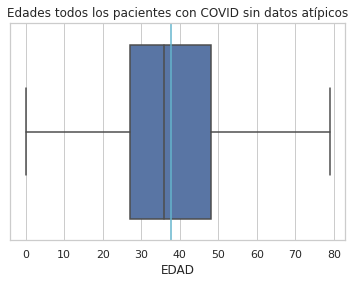

In [ ]:
ax=sns.boxplot(x=df_covid_filtrado['EDAD'])
ax.set(title ='Edades todos los pacientes con COVID sin datos at√≠picos')
plt.axvline(df_covid_filtrado['EDAD'].mean(), c='c');


In [ ]:
edades2 = df_covid_filtrado['EDAD']

In [ ]:
print("Valores antes del Score del IQR")
print(f'Valor de la media: {edades.mean()}')
print(f'Valor de la mediana: {edades.median()}')
print(f'Valor de la desviaci√≥n est√°ndar: {edades.std()}')
print("----------------------------")
print("Valores despu√©s del Score del IQR")
print(f'Valor de la media: {edades2.mean()}')
print(f'Valor de la mediana: {edades2.median()}')
print(f'Valor de la desviaci√≥n est√°ndar: {edades2.std()}')

Valores antes del Score del IQR
Valor de la media: 38.26994316490612
Valor de la mediana: 37.0
Valor de la desviaci√≥n est√°ndar: 15.655174323149904
----------------------------
Valores despu√©s del Score del IQR
Valor de la media: 37.6620562265702
Valor de la mediana: 36.0
Valor de la desviaci√≥n est√°ndar: 14.785844596811353


Con la comparaci√≥n anterior, se observa que hay un ligero cambio en los valores al eliminar los valores at√≠picos, se muestra la concentraci√≥n de los datos entre 25 y 50 a√±os de los pacientes con COVID.

###**Tabla de frecuencias**
Vamos a dividir todas las edades en grupos para saber cu√°ntas muestras tenemos en cada rango y as√≠ tenemos otra forma de identificar los valores at√≠picos. Para este ejercicio, dividimos el total de muestras en 20 intervalos.

In [ ]:
segmentos = pd.cut(edades, 20)
edades.groupby(segmentos).count()

EDAD
(-0.122, 6.1]      23435
(6.1, 12.2]        38971
(12.2, 18.3]       55770
(18.3, 24.4]      178968
(24.4, 30.5]      261882
(30.5, 36.6]      252459
(36.6, 42.7]      220865
(42.7, 48.8]      196001
(48.8, 54.9]      165451
(54.9, 61.0]      123506
(61.0, 67.1]       50019
(67.1, 73.2]       29648
(73.2, 79.3]       18489
(79.3, 85.4]       11683
(85.4, 91.5]        6317
(91.5, 97.6]        2056
(97.6, 103.7]        450
(103.7, 109.8]        96
(109.8, 115.9]        27
(115.9, 122.0]        44
Name: EDAD, dtype: int64

Ahora tenemos una tabla donde los √≠ndices son los 20 rangos en los que se dividi√≥ nuestro dataset y los valores de la tabla son los conteos de cada agrupaci√≥n. De esta manera quedan a√∫n en m√°s evidencia los valores at√≠picos, ya que podemos ver varios segmentos donde la cantidad de muestras es muy baja (edades mayores a 100 a√±os). 

Hacemos el mismo ejercicio para las edades de las mujeres y hombres

Tabla de frecuencia para las mujeres

In [ ]:
segmentos_m = pd.cut(edades_mujeres, 20)
edades_mujeres.groupby(segmentos_m).count()

EDAD
(-0.122, 6.1]      10553
(6.1, 12.2]        18586
(12.2, 18.3]       29218
(18.3, 24.4]       99512
(24.4, 30.5]      145764
(30.5, 36.6]      142273
(36.6, 42.7]      128082
(42.7, 48.8]      115873
(48.8, 54.9]       97580
(54.9, 61.0]       69560
(61.0, 67.1]       27130
(67.1, 73.2]       15083
(73.2, 79.3]        9001
(79.3, 85.4]        5418
(85.4, 91.5]        2986
(91.5, 97.6]         958
(97.6, 103.7]        215
(103.7, 109.8]        44
(109.8, 115.9]        13
(115.9, 122.0]         5
Name: EDAD, dtype: int64

Tabla de frecuencias para los hombres

In [ ]:
segmentos_h = pd.cut(edades_hombres, 20)
edades_hombres.groupby(segmentos_h).count()

EDAD
(-0.122, 6.1]      12882
(6.1, 12.2]        20385
(12.2, 18.3]       26552
(18.3, 24.4]       79456
(24.4, 30.5]      116118
(30.5, 36.6]      110186
(36.6, 42.7]       92783
(42.7, 48.8]       80128
(48.8, 54.9]       67871
(54.9, 61.0]       53946
(61.0, 67.1]       22889
(67.1, 73.2]       14565
(73.2, 79.3]        9488
(79.3, 85.4]        6265
(85.4, 91.5]        3331
(91.5, 97.6]        1098
(97.6, 103.7]        235
(103.7, 109.8]        52
(109.8, 115.9]        14
(115.9, 122.0]        39
Name: EDAD, dtype: int64

###**Histograma**
Ahora mostramos la gr√°fica de estos datos con un histograma, indicando los 20 segmentos en que dividimos el total de muestras

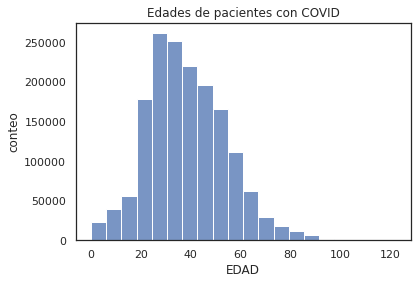

In [ ]:
sns.set(style='white')
#ax = sns.distplot(edades, kde=False, norm_hist=False, bins=20)
ax = sns.histplot(edades, kde=False,bins=20) #sustituye a la funci√≥n distplot porque dice que ya est√° deprecada y marca un mensaje grande de warning
ax.set(title='Edades de pacientes con COVID', ylabel='conteo');

Si queremos mayor granularidad en las barras, podemos aumentar el n√∫mero de bins

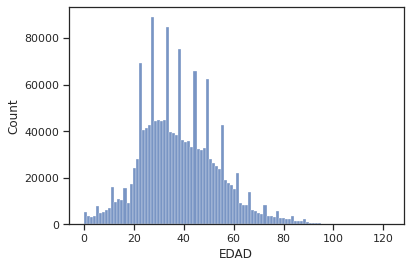

In [ ]:
sns.set(style='ticks')
#sns.distplot(edades, kde=False, norm_hist=False, bins=100)
sns.histplot(edades, kde=False, bins=100);

Ahora graficamos las varibles para hombres y mujeres

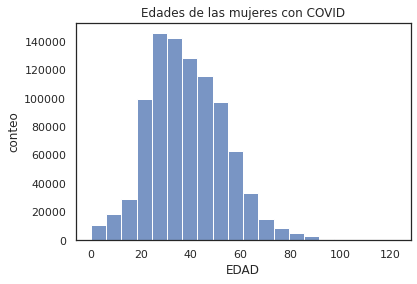

In [ ]:
sns.set(style='white')
ax = sns.histplot(edades_mujeres, kde=False,bins=20)
ax.set(title='Edades de las mujeres con COVID', ylabel='conteo');

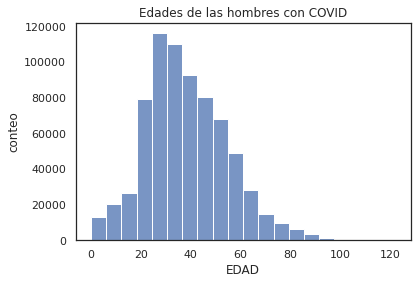

In [ ]:
sns.set(style='white')
ax = sns.histplot(edades_hombres, kde=False,bins=20)
ax.set(title='Edades de las hombres con COVID', ylabel='conteo');

###**Curtosis y asimetr√≠a**
Obtenemos estos valores (kurtosis y skew) para describir el histograma 

In [ ]:
print(f'Curtosis de las edades de todos los pacientes: {kurtosis(edades)}')
print(f'Asimetr√≠a de las edades de todos los pacientes: {skew(edades)}')

Curtosis de las edades de todos los pacientes: 0.3335072211238277
Asimetr√≠a de las edades de todos los pacientes: 0.4481706669880417


Se observa que hay una asimetr√≠a positiva, es decir que la cola de la derecha es m√°s larga que la cola de la izquierda. Adem√°s la curtosis positiva indica que nuestra distribuci√≥n est√° achatada. Esto implica que hay m√°s dispersi√≥n de nuestros datos, que est√°n m√°s lejanos de nuestro punto central y que por lo tanto tenemos colas largas (comparadas con la cola normal).


Ahora repetimos el ejercicio para edades de hombres y mujeres, en donde se observa un comportamiento similiar al de todos los pacientes

In [ ]:
print(f'Curtosis de las edades de las  mujeres: {kurtosis(edades_mujeres)}')
print(f'Asimetr√≠a de las edades de las mujeres: {skew(edades_mujeres)}')
print("----------------------------------------------------------------------")
print(f'Curtosis de las edades de los hombres: {kurtosis(edades_hombres)}')
print(f'Asimetr√≠a de las edades de los hombres: {skew(edades_hombres)}')

Curtosis de las edades de las  mujeres: 0.3256472867345477
Asimetr√≠a de las edades de las mujeres: 0.42213010020028036
----------------------------------------------------------------------
Curtosis de las edades de los hombres: 0.311612698708883
Asimetr√≠a de las edades de los hombres: 0.4785339369657488


###**Gr√°ficas de densidad**
Vamos a graficar la distribuci√≥n de densidad de las edades de los pacientes con COVID

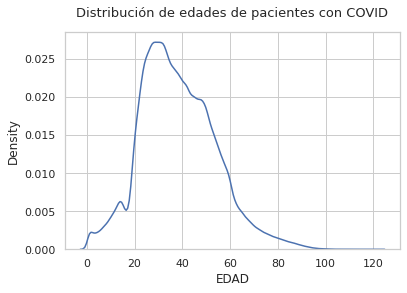

In [ ]:
sns.set(style="whitegrid")
#ax = sns.displot(edades, kind="kde")
ax = sns.kdeplot(edades) #sustituye a la funci√≥n distplot porque dice que ya est√° deprecada y marca un mensaje grande de warning
ax.set_title('Distribuci√≥n de edades de pacientes con COVID', fontsize=13, pad=15);

Ahora mostramos la gr√°fica de densidad para hombres y mujeres

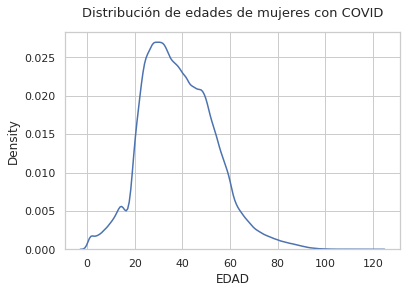

In [ ]:
sns.set(style='whitegrid')
ax = sns.kdeplot(edades_mujeres)
ax.set_title('Distribuci√≥n de edades de mujeres con COVID', fontsize=13, pad=15);

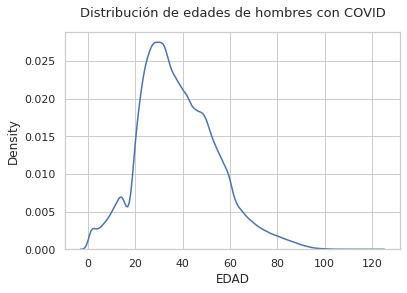

In [ ]:
sns.set(style='whitegrid')
ax = sns.kdeplot(edades_hombres)
ax.set_title('Distribuci√≥n de edades de hombres con COVID', fontsize=13, pad=15);

Vamos a comparar las edades de los pacientes que tienen COVID contra aquellos que no tienen

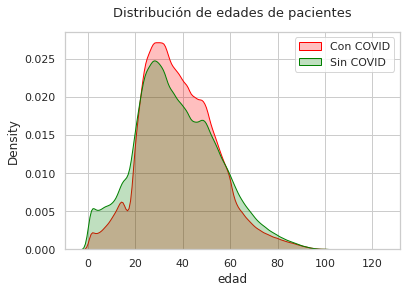

In [ ]:
sns.set(style='whitegrid')
#ax = sns.distplot(edades, hist = False, kde_kws = {'shade': True}, label='COVID')
#sns.distplot(edades_nocovid, hist = False, kde_kws = {'shade': True},label='No COVID')

ax = sns.kdeplot(edades, fill=True, color='red')  #sustituye a la funci√≥n distplot porque dice que ya est√° deprecada y marca un mensaje grande de warning
sns.kdeplot(edades_nocovid, fill=True, color='green')
ax.set_title('Distribuci√≥n de edades de pacientes', fontsize=13, pad=15)
ax.set(xlabel='edad')
plt.legend(labels=["Con COVID","Sin COVID"])
plt.show()
#ax.legend(loc='upper right');


#Postwork 3: Exploraci√≥n de Variables Categ√≥ricas y An√°lisis Multivariable

###**Gr√°ficas de barras y la moda**

Para las gr√°ficas de barras se usar√° la variable categorica SECTOR y as√≠ observar en qu√© sectores de salud hay m√°s pacientes con COVID

In [ ]:
sectores = pd.DataFrame(df_covid['SECTOR'].value_counts())
sectores

SECTOR
IMSS             932358
SSA              546924
PRIVADA           81816
ISSSTE            35541
ESTATAL           14537
PEMEX              9496
IMSS-BIENESTAR     7217
MUNICIPAL          2324
SEDENA             2073
SEMAR              1866
UNIVERSITARIO       808
CRUZ ROJA           688
NO ESPECIFICADO     327
DIF                 162

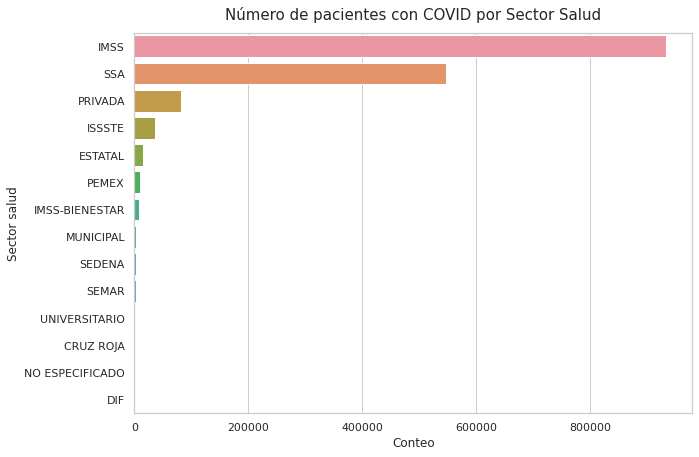

In [ ]:
sns.set(style='whitegrid')
fig = plt.figure(figsize=(10, 7))
ax = sns.barplot(sectores, x='SECTOR', y=sectores.index, orient='h')
ax.set_title('N√∫mero de pacientes con COVID por Sector Salud',fontsize=15,pad=13)
ax.set(ylabel='Sector salud');
ax.set(xlabel='Conteo');

In [ ]:
as_percentages = sectores * 100 / sectores.sum()

In [ ]:
as_percentages

SECTOR
IMSS             56.985326
SSA              33.427763
PRIVADA           5.000559
ISSSTE            2.172251
ESTATAL           0.888495
PEMEX             0.580391
IMSS-BIENESTAR    0.441100
MUNICIPAL         0.142042
SEDENA            0.126701
SEMAR             0.114049
UNIVERSITARIO     0.049385
CRUZ ROJA         0.042050
NO ESPECIFICADO   0.019986
DIF               0.009901

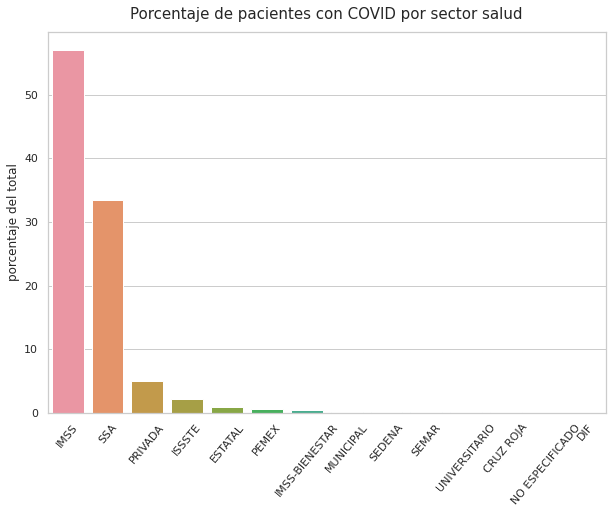

In [ ]:
fig = plt.figure(figsize=(10, 7))
as_percentages = sectores * 100 / sectores.sum()
ax = sns.barplot(as_percentages,x=as_percentages.index, y='SECTOR')
ax.set_title('Porcentaje de pacientes con COVID por sector salud',fontsize=15,pad=13)
ax.set(ylabel='porcentaje del total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);


En las gr√°ficas se puede observar que el sector que tiene m√°s pacientes con COVID es el IMSS, lo cual representa a la **MODA** ya que es el valor que m√°s se repite, pero tambi√©n se puede obtener mediante la funci√≥n **mode()**

In [ ]:
df_covid['SECTOR'].mode()

0    IMSS
Name: SECTOR, dtype: object

Se analiza otra variable categorica RESULTADO, para observar del total de pacientes, cu√°ntos tienen COVID y cu√°ntos no.

In [ ]:
diagnostico = pd.DataFrame(df['RESULTADO_ANTIGENO'].value_counts())
#diagnostico = df['RESULTADO_ANTIGENO']
diagnostico

RESULTADO_ANTIGENO
POSITIVO A SARS-COV-2                    1424175
NEGATIVO A SARS-COV-2                    1206115
NO APLICA (CASO SIN MUESTRA)              369710

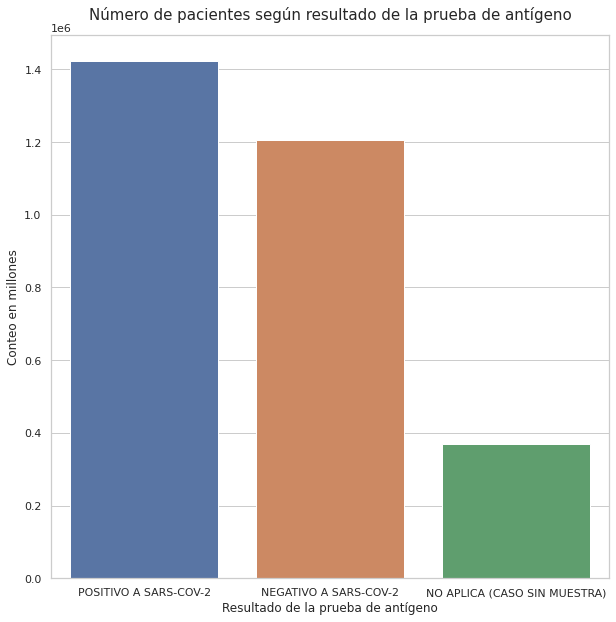

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = sns.barplot(diagnostico, x=diagnostico.index,y='RESULTADO_ANTIGENO')
ax.set_title('N√∫mero de pacientes seg√∫n resultado de la prueba de ant√≠geno', fontsize=15, pad=15)
ax.set(ylabel='Conteo en millones')
ax.set(xlabel='Resultado de la prueba de ant√≠geno');

###**Tablas de contigencia**
Para este ejercicio tomaremos el resultado de la prueba de ant√≠geno y el sexo de los pacientes registrados

In [ ]:
pd.crosstab(df['RESULTADO_ANTIGENO'], df['SEXO'],margins=True, margins_name='Total')

SEXO                           Hombre    Mujer    Total
RESULTADO_ANTIGENO                                     
NEGATIVO A SARS-COV-2          533640   672475  1206115
NO APLICA (CASO SIN MUESTRA)   165843   203867   369710
POSITIVO A SARS-COV-2          624184   799991  1424175
Total                         1323667  1676333  3000000

En esta tabla se muestra la relaci√≥n entre las mujeres y hombres con tabaquismo seg√∫n el resultado de la prueba de ant√≠geno 

In [ ]:
pd.crosstab(df['RESULTADO_ANTIGENO'], [df['SEXO'],df['TABAQUISMO']],margins=True, margins_name='Total')

SEXO                         Hombre                 Mujer                 \
TABAQUISMO                        1        2    98      1        2    98   
RESULTADO_ANTIGENO                                                         
NEGATIVO A SARS-COV-2         33459   498715  1466  21889   649081  1505   
NO APLICA (CASO SIN MUESTRA)   9213   155890   740   5871   197411   585   
POSITIVO A SARS-COV-2         36714   584865  2605  23974   773492  2525   
Total                         79386  1239470  4811  51734  1619984  4615   

SEXO                            Total  
TABAQUISMO                             
RESULTADO_ANTIGENO                     
NEGATIVO A SARS-COV-2         1206115  
NO APLICA (CASO SIN MUESTRA)   369710  
POSITIVO A SARS-COV-2         1424175  
Total                         3000000

En esta tabla de contingencia se observa la relaci√≥n entre hombres y mujeres con **obesidad** seg√∫n el resultado de prueba de ant√≠geno

In [ ]:
pd.crosstab(df['RESULTADO_ANTIGENO'], [df['SEXO'],df['OBESIDAD']],margins=True, margins_name='Total')

SEXO                         Hombre                  Mujer                 \
OBESIDAD                          1        2    98       1        2    98   
RESULTADO_ANTIGENO                                                          
NEGATIVO A SARS-COV-2         24519   507791  1330   39152   631947  1376   
NO APLICA (CASO SIN MUESTRA)   9502   155624   717   13723   189582   562   
POSITIVO A SARS-COV-2         39274   582573  2337   57449   740256  2286   
Total                         73295  1245988  4384  110324  1561785  4224   

SEXO                            Total  
OBESIDAD                               
RESULTADO_ANTIGENO                     
NEGATIVO A SARS-COV-2         1206115  
NO APLICA (CASO SIN MUESTRA)   369710  
POSITIVO A SARS-COV-2         1424175  
Total                         3000000

En esta tabla de contingencia se observa la relaci√≥n entre hombres y mujeres con **hipertensi√≥n** seg√∫n el resultado de prueba de ant√≠geno

In [ ]:
pd.crosstab(df['RESULTADO_ANTIGENO'], [df['SEXO'],df['HIPERTENSION']],margins=True, margins_name='Total')

SEXO                          Hombre                  Mujer                 \
HIPERTENSION                       1        2    98       1        2    98   
RESULTADO_ANTIGENO                                                           
NEGATIVO A SARS-COV-2          39167   493002  1471   56592   614381  1502   
NO APLICA (CASO SIN MUESTRA)   16565   148550   728   20915   182372   580   
POSITIVO A SARS-COV-2          50952   570652  2580   68723   728751  2517   
Total                         106684  1212204  4779  146230  1525504  4599   

SEXO                            Total  
HIPERTENSION                           
RESULTADO_ANTIGENO                     
NEGATIVO A SARS-COV-2         1206115  
NO APLICA (CASO SIN MUESTRA)   369710  
POSITIVO A SARS-COV-2         1424175  
Total                         3000000

En esta tabla de contingencia se observa la relaci√≥n entre hombres y mujeres con **diabetes** seg√∫n el resultado de prueba de ant√≠geno

In [ ]:
pd.crosstab(df['RESULTADO_ANTIGENO'], [df['SEXO'],df['DIABETES']],margins=True, margins_name='Total')

SEXO                         Hombre                  Mujer                 \
DIABETES                          1        2    98       1        2    98   
RESULTADO_ANTIGENO                                                          
NEGATIVO A SARS-COV-2         29854   502271  1515   41263   629621  1591   
NO APLICA (CASO SIN MUESTRA)  12206   152871   766   14451   188781   635   
POSITIVO A SARS-COV-2         34392   587132  2660   46374   751024  2593   
Total                         76452  1242274  4941  102088  1569426  4819   

SEXO                            Total  
DIABETES                               
RESULTADO_ANTIGENO                     
NEGATIVO A SARS-COV-2         1206115  
NO APLICA (CASO SIN MUESTRA)   369710  
POSITIVO A SARS-COV-2         1424175  
Total                         3000000

En esta tabla de contingencia se observa la relaci√≥n en 2 niveles entre hombres y mujeres con **obesidad y diabetes** seg√∫n el resultado de prueba de ant√≠geno

In [ ]:
pd.crosstab(df['RESULTADO_ANTIGENO'], [df['SEXO'],df['DIABETES'],df['OBESIDAD']],margins=True, margins_name='Total')

SEXO                         Hombre                                            \
DIABETES                          1                 2                 98        
OBESIDAD                          1      2  98      1        2   98    1    2   
RESULTADO_ANTIGENO                                                              
NEGATIVO A SARS-COV-2          4139  25699  16  20269   481927   75  111  165   
NO APLICA (CASO SIN MUESTRA)   1863  10336   7   7618   145214   39   21   74   
POSITIVO A SARS-COV-2          5823  28553  16  33227   553861   44  224  159   
Total                         11825  64588  39  61114  1181002  158  356  398   

SEXO                                Mujer                                  \
DIABETES                                1                 2                 
OBESIDAD                        98      1      2  98      1        2   98   
RESULTADO_ANTIGENO                                                          
NEGATIVO A SARS-COV-2         1239   7934  33317  12  31088   598436   97   
NO APLICA (CASO SIN MUESTRA)   671   2813  11629   9  10890   177859   32   
POSITIVO A SARS-COV-2         2277   9725  36635  14  47490   703458   76   
Total                         4187  20472  81581  35  89468  1479753  205   

SEXO                                            Total  
DIABETES                       98                      
OBESIDAD                        1    2    98           
RESULTADO_ANTIGENO                                     
NEGATIVO A SARS-COV-2         130  194  1267  1206115  
NO APLICA (CASO SIN MUESTRA)   20   94   521   369710  
POSITIVO A SARS-COV-2         234  163  2196  1424175  
Total                         384  451  3984  3000000

En esta tabla de contingencia se observa la relaci√≥n entre hombres y mujeres con **diabetes**.

In [ ]:
pd.crosstab(df['DIABETES'], df['SEXO'],margins=True, margins_name='Total')

SEXO       Hombre    Mujer    Total
DIABETES                           
1           76452   102088   178540
2         1242274  1569426  2811700
98           4941     4819     9760
Total     1323667  1676333  3000000

###**Graficando con m√∫ltiples axis**
Para este ejercicio tomaremos el resultado de la prueba de ant√≠geno y el sexo de los pacientes registrados

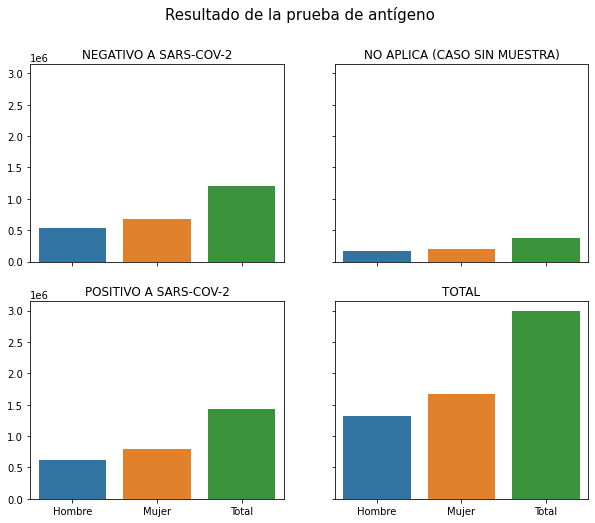

In [ ]:
crosstab = pd.crosstab(df['RESULTADO_ANTIGENO'], df['SEXO'],margins=True, margins_name='Total')
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
sns.barplot(pd.DataFrame(crosstab.iloc[0]), x=crosstab.iloc[0].index, y='NEGATIVO A SARS-COV-2', ax=axes[0, 0])
sns.barplot(pd.DataFrame(crosstab.iloc[1]), x=crosstab.iloc[1].index, y='NO APLICA (CASO SIN MUESTRA)', ax=axes[0, 1])
sns.barplot(pd.DataFrame(crosstab.iloc[2]), x=crosstab.iloc[2].index, y='POSITIVO A SARS-COV-2', ax=axes[1, 0])
sns.barplot(pd.DataFrame(crosstab.iloc[3]), x=crosstab.iloc[3].index, y='Total', ax=axes[1, 1])

axes[0, 0].set(xlabel='', ylabel='', title='NEGATIVO A SARS-COV-2')
axes[0, 1].set(xlabel='', ylabel='', title='NO APLICA (CASO SIN MUESTRA)')
axes[1, 0].set(xlabel='', ylabel='', title='POSITIVO A SARS-COV-2')
axes[1, 1].set(xlabel='', ylabel='', title='TOTAL')

fig.suptitle('Resultado de la prueba de ant√≠geno', fontsize=15);

En las multigr√°ficas se observa la diferencia de todos los resultados de ant√≠geno, se puede ver que del total de muestras la cantidad es similar tanto para los hombres como para las mujeres y son pocos en donde no existe una muestra de ant√≠geno

###Boxplots y Violins


Se grafican boxplots donde se combinan una variable num√©rica EDAD con una variable categ√≥rica SEXO en la misma figura, que es lo que hab√≠amos obtenido en el postwork 2 en gr√°ficas separadas. Aqu√≠ se muestra claramente la ligera diferencia entre las mujeres y hombres con COVID

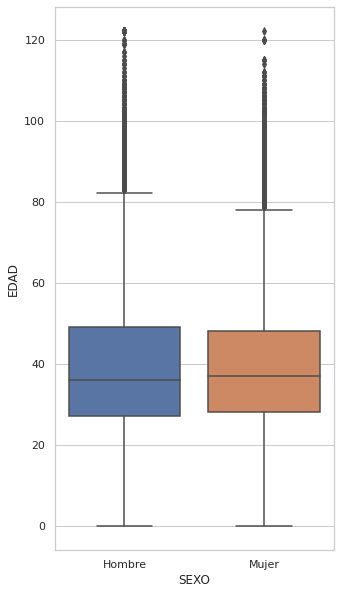

In [ ]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=df_covid, x='SEXO', y='EDAD');

###Violinplots
Un violinplot es muy parecido a un boxplot, con la diferencia que en vez de graficar frecuencias grafica estimados de densidad, por lo que podemos interpretarlo como un boxplot mezclado con una gr√°fica de densidad. Aqu√≠ es mucho m√°s f√°cil ver ciertos detalles en la distribuci√≥n de los datos que no es posible ver en los boxplots pero es mucho m√°s dif√≠cil ver los valores at√≠picos y d√≥nde se encuentran ubicados.

Ahora observamos los violinplots para las edades por sexo en donde la 'pildorita' negra en medio del violinplot representa el Rango Intercuart√≠lico y el punto blanco la mediana.

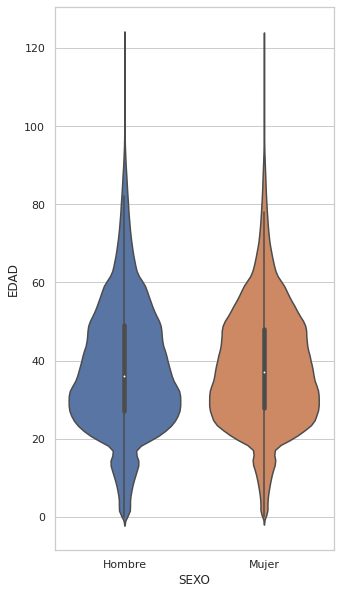

In [ ]:
plt.figure(figsize=(5, 10))
sns.violinplot(data=df_covid, x='SEXO', y='EDAD');

#Postwork 4: Correlaciones y Regresi√≥n Lineal Simple
En este Postwork vamos a hacer an√°lisis bivariado de nuestras variables num√©ricas. Dado que nuestro dataset s√≥lo tiene variables categ√≥ricas, vamos a construir subdatasets del mismo haciendo agrupaciones por algunas variables y tomando como √≠ndice de los datos las edades de los pacientes, de esta manera tendremos valores que indiquen cu√°ntos pacientes tienen alguna comorbilidad seg√∫n su edad.

Primero filtramos nuestro dataFrame para obtener solo pacientes positivos a covid, y que hayan presentado alguna comorbilidad.

In [ ]:
comorbilidades = ['DIABETES', 'EPOC', 'ASMA', 'HIPERTENSION', 'CARDIOVASCULAR'\
                  ,'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']

filtro = 'RESULTADO_LAB==1 & (DIABETES == 1 or EPOC == 1 or ASMA == 1 or ' + \
          'HIPERTENSION == 1 or CARDIOVASCULAR == 1 or OBESIDAD == 1 or ' + \
          'RENAL_CRONICA == 1 or TABAQUISMO == 1)'

df_positivos = pd.DataFrame(df.query(filtro))

Posteriormente contabilizamos las comorbilidades y las agrupamos

In [ ]:
df_con_comorbilidades = df_positivos[comorbilidades].groupby(comorbilidades).sum().reset_index()
df_con_comorbilidades.head()

DIABETES  EPOC  ASMA  HIPERTENSION  CARDIOVASCULAR  OBESIDAD  \
0         1     1     1             1               1         1   
1         1     1     1             1               1         1   
2         1     1     1             1               1         1   
3         1     1     1             1               1         1   
4         1     1     1             1               1         1   

   RENAL_CRONICA  TABAQUISMO  
0              1           1  
1              1           2  
2              1          98  
3              2           1  
4              2           2

###**Matriz de correlaciones y mapas de calor**

En una matriz podr√≠amos ver mejor las correlaciones.


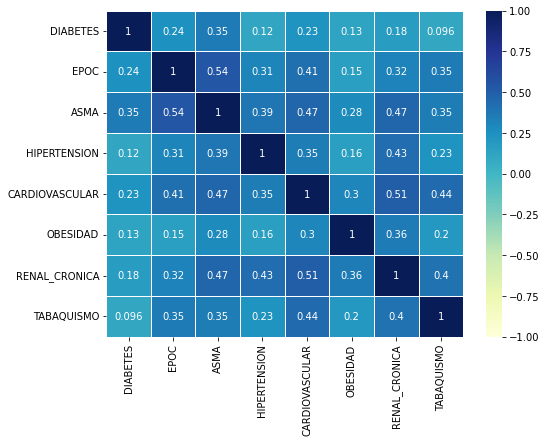

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_con_comorbilidades.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

###**Pairplots**

Y en un pairplot tambi√©n quedan evidentes las claras correlaciones entre comorbilidades

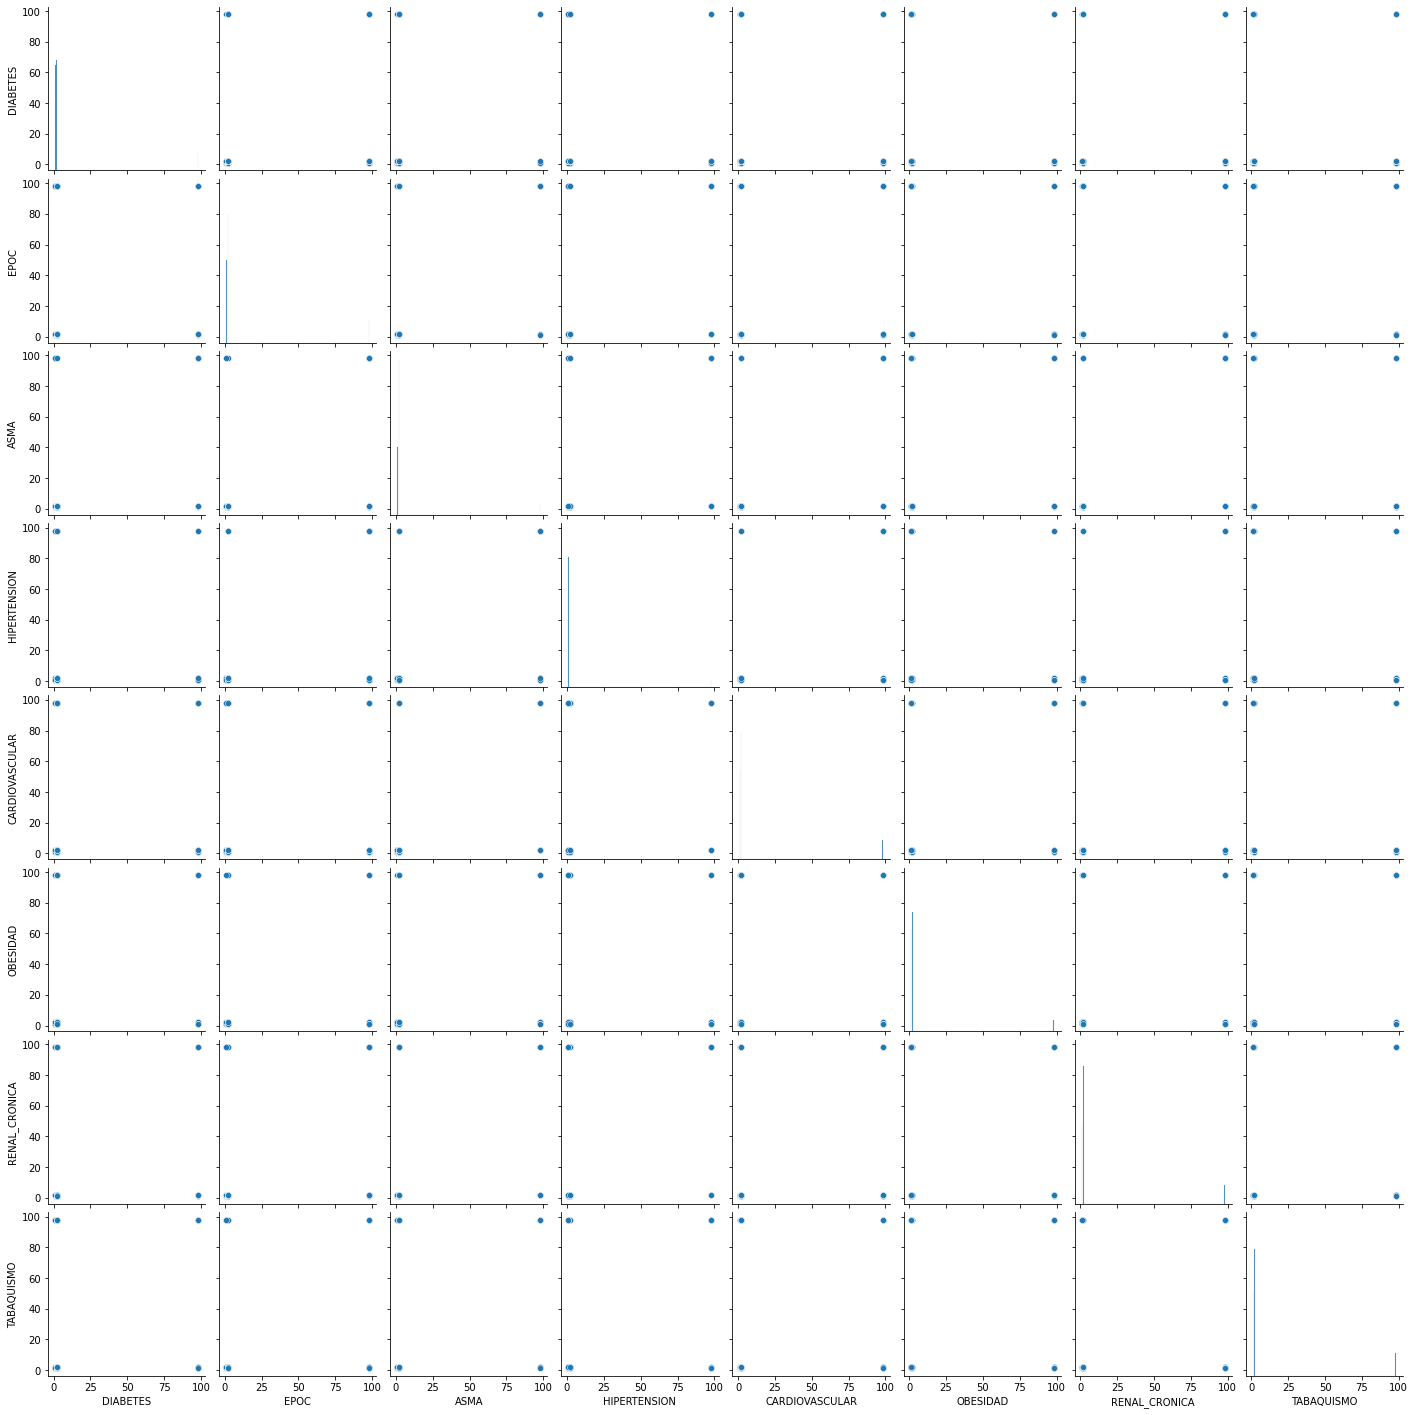

In [ ]:
sns.pairplot(df_con_comorbilidades)

###**Regresi√≥n Lineal Simple**
Para demostrar una regresi√≥n lineal trabajaremos con las variables de comorbilidad CARDIOVASCULAR y RENAL_CRONICA (que muestran tener la m√°s alta correlaci√≥n)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
serie_1 = df_con_comorbilidades['CARDIOVASCULAR']
serie_2 = df_con_comorbilidades['RENAL_CRONICA']
lr = LinearRegression()

lr.fit(serie_1.to_frame(), serie_2)

y_predict = lr.predict(serie_1.to_frame())

Graficamos los Y originales y los Y predichos

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


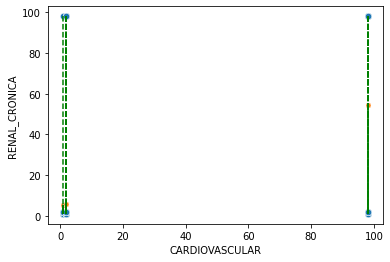

In [ ]:
sns.scatterplot(serie_1, serie_2, s = 40)
sns.scatterplot(serie_1, y_predict, s = 25)

for i in range(len(serie_1)):
    plt.plot([serie_1[i], serie_1[i]], [serie_2[i], y_predict[i]], 'g--')

Extrayendo la ecuaci√≥n de la l√≠nea del modelo entrenado

In [ ]:
intercept = lr.intercept_
coefficient = lr.coef_[0]

Y la funci√≥n predictiva queda como sigue.

In [ ]:
print(f'y = {coefficient} * x + {intercept}')

y = 0.507265577352529 * x + 4.643902132434072


#Postwork 5: Distribuciones muestrales y t√©cnicas de evaluaci√≥n de modelos
Vamos a analizar la incertidumbre y los sesgos que existen en las medidas de locaci√≥n y dispersi√≥n de nuestras variables num√©ricas.


###Bootstrap
#### La distribuci√≥n, su asimetr√≠a y curtosis

Utilizamos el algoritmo de Bootstrap para revisar qu√© tanto podemos confiar en nuestra medida estad√≠stica de edad.

Detectamos que la distribuci√≥n muestral de la media en las edades es bastante normal en forma.

In [ ]:
df_covid_filtrado_pw5 = df_covid_filtrado.copy()
df_covid_filtrado_pw5['EDAD'].sample(frac=0.1, replace=True)

1924431    33
2347102    36
734698     73
1659897    63
1344554    34
           ..
950602     41
2305310    47
987091     32
927180     40
1703471    26
Name: EDAD, Length: 161546, dtype: int64

In [ ]:
means = []
medians = []
edad_pw5 = df_covid_filtrado_pw5['EDAD']

for i in range(100_000):
    sample = edad_pw5.sample(n=50, replace=True)
    means.append(sample.mean())
    medians.append(sample.median())
    
serie_means = pd.Series(means)
serie_medians = pd.Series(medians)

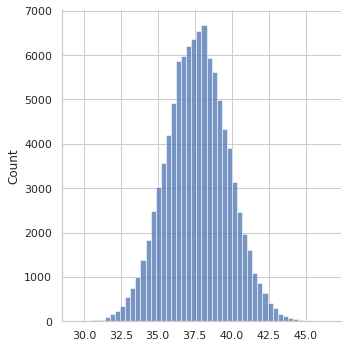

In [ ]:
sns.set(style='whitegrid')
sns.displot(serie_means,bins=50); #sustituye a la funci√≥n distplot porque dice que ya est√° deprecada y marca un mensaje grande de warning
#sns.distplot(serie_means, kde=False, norm_hist=False);

Si revisamos la distribuci√≥n de nuestra mediana, detectamos que tambi√©n presenta una forma normal, los picos en la distribuci√≥n se encuentran en el mismo lugar que nuestro histograma de medias.

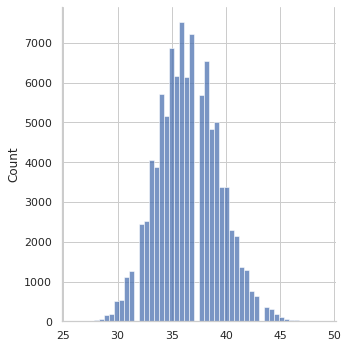

In [ ]:
sns.displot(serie_medians, kde=False, bins=50);

Obtenemos la asimetr√≠a y curtosis de las series de Medias y Medianas.

In [ ]:
asimetria_medias = serie_means.skew()
asimetria_medianas = serie_medians.skew()
curtosis_medias= serie_means.kurtosis()
curtosis_medianas = serie_medians.kurtosis()

print(f"Asimetr√≠a de Media:\t{asimetria_medias}")
print(f"Asimetr√≠a de Medianas:\t{asimetria_medianas}")
print(f"Curtosis de Medias:\t{curtosis_medias}")
print(f"Curtosis de Medianas:\t{curtosis_medianas}")

Asimetr√≠a de Media:	0.02782359631075524
Asimetr√≠a de Medianas:	0.174681348400407
Curtosis de Medias:	-0.009779193297313249
Curtosis de Medianas:	-0.05749210001416882


###**Error Estandar**

El error est√°ndar nos dice qu√© tan dispersas est√°n nuestras medidas estad√≠sticas.

Los intervalos de confianza son una manera de mostrar la incertidumbre.

In [ ]:
print(f'Error estandar: {serie_means.std()}')
print(f'Valor m√≠nimo: {serie_means.min()}')
print(f'Valor m√°ximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Error estandar: 2.088277466735975
Valor m√≠nimo: 29.36
Valor m√°ximo: 46.56
Rango: 17.200000000000003


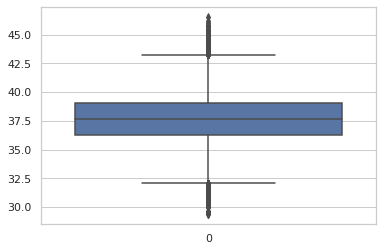

In [ ]:
sns.boxplot(serie_means);

In [ ]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

Podemos escribir nuestro intervalo de confianza de dos maneras distintas:

In [ ]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {edad_pw5.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 33.6 < 37.6620562265702 < 41.82


In [ ]:
mean_of_intervals = ((edad_pw5.mean() - limite_inferior) + (limite_superior - edad_pw5.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {edad_pw5.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 37.6620562265702 +/- 4.109999999999999


Podemos visualizar estos l√≠mites tambi√©n:

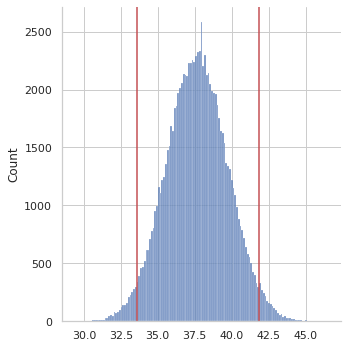

In [ ]:
#sns.distplot(serie_means, kde=False, norm_hist=False)
sns.displot(serie_means, kde=False)
plt.axvline(limite_inferior, c= 'r')
plt.axvline(limite_superior, c = 'r');

###**T√©cnicas de evaluaci√≥n de modelos**
####Regresi√≥n Linear M√∫ltiple

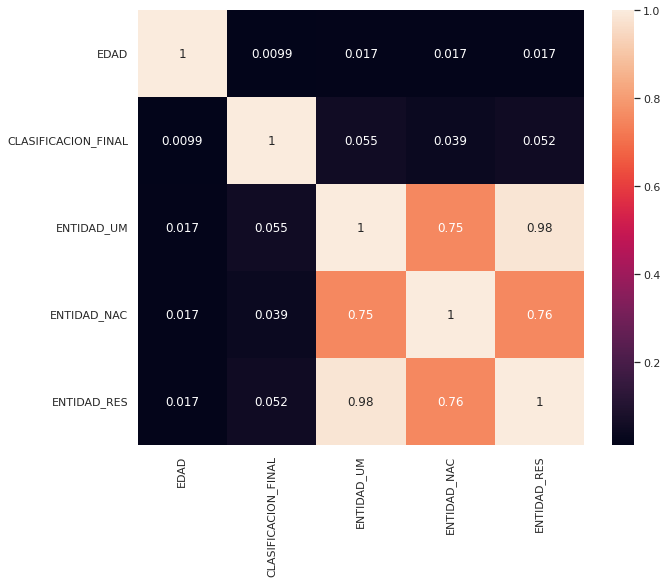

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_covid_filtrado.corr(), annot=True);

Dividimos nuestro dataset en dos para intentar predecir la clasificaci√≥n final seg√∫n las variables EDAD y ENTIDAD_NAC.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_covid_filtrado[['EDAD', 'ENTIDAD_NAC']]
y = df_covid_filtrado['CLASIFICACION_FINAL']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
lr = LinearRegression()
lr.fit(X_training, y_training)
lr.score(X_test, y_test)

0.0016087007174950818

Nuestro resultado es menor que los coeficientes de correlaci√≥n que tienen las variables.

In [ ]:
lr_2 = LinearRegression()
lr_2.fit(X, y)
lr_2.score(X, y)

0.0016252025075130794

###**Validaci√≥n cruzada**

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
scores = cross_validate(lr, X, y, scoring='r2')
scores

{'fit_time': array([0.50804067, 0.45805073, 0.35893083, 0.41598248, 0.39719129]),
 'score_time': array([0.02377105, 0.01554155, 0.02448082, 0.02899671, 0.05339646]),
 'test_score': array([-1.32305287e-03,  2.58806087e-05,  7.84220503e-04,  1.57520029e-03,
        -2.67306556e-03])}

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: -0.000 +/- 0.002


# Postwork 6: Visualizaci√≥n de datos avanzada

Para la visualizaci√≥n avanzada estamos usando mapas coropl√©ticos, los cuales con el sombreado, tintes o proporciones pueden mostrarnos las diferencias relativas que van del sombreado claro (los de baja densidad) hasta el sombreado oscuro (donde reside la mayor densidad).

Creamos este mapa, usando un archivo de JSON con los datos geogr√°ficos de los estados de M√©xico y cruz√°ndolos con un archivo CSV el cu√°l contiene el nombre de los estados de M√©xico y el n√∫mero de casos confirmados por cada uno de ellos. 

Teniendo estos archivos, usamos la biblioteca de visualizaci√≥n Folium para la creaci√≥n de mapas interactivos, y le agregamos un puntero, el cu√°l cuando hacemos un *hover* sobre cada uno de ellos nos muestra su nombre y el n√∫mero de casos confirmados.

En el desarrollo se tom√≥ el archivo JSON y se recorrieron las propiedades, usando del CSV, las propiedades **estado** y **conteo**, despu√©s creamos una versi√≥n indexada del dataframe para poder buscar los valores, usando como index el valor **estado**, posteriormente se recorre el archivo de las geopropiedades, y se toma la propiedad **name**, se le agrega la propiedad **conteo**; para finalizar se agrega esto a un *tootlip*, y se pone como un layer a nuestro mapa.

###**Mapa coropl√©tico**

In [ ]:
import folium

state_geo = f'/content/drive/MyDrive/proyectoBedu_python/modulo4/Remoto mexico.json'
state_data = pd.read_csv('/content/drive/MyDrive/proyectoBedu_python/modulo4/casos.csv', index_col=0)

m = folium.Map(location=[24, -104], zoom_start=5, width='60%', height='60%')

cp = folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=["estado", "conteo"],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,   
    legend_name='N√∫mero de casos'
).add_to(m)

state_data_indexed = state_data.set_index('estado')
  
for s in cp.geojson.data['features']:
  name = s["properties"]["name"]
  if name in state_data_indexed.index:
    s['properties']['conteo'] = int(state_data_indexed.loc[name, 'conteo'])
  else:
    s['properties']['conteo'] = 0
  #print(s["properties"]["name"] + " - " + str(s["properties"]["conteo"]))

folium.GeoJsonTooltip(['name', 'conteo']).add_to(cp.geojson)
  
folium.LayerControl().add_to(m)
 
m

 - 0
Baja California - 81937
Baja California Sur - 63333
Coahuila - 82682
Chihuahua - 88401
Durango - 29820
Sinaloa - 105094
Sonora - 77280
Zacatecas - 39287
Nuevo Le√≥n - 207155
San Luis Potos√≠ - 141224
Tamaulipas - 76443
Aguascalientes - 50802
Colima - 37379
Jalisco - 127823
Michoac√°n - 42379
Nayarit - 41337
Campeche - 19735
Oaxaca - 73023
Puebla - 94178
Tabasco - 77218
Tlaxcala - 30894
Ciudad de M√©xico - 837851
Guanajuato - 162336
Guerrero - 41417
Hidalgo - 63972
M√©xico - 315727
Morelos - 48438
Quer√©taro - 84594
Veracruz - 109931
Chiapas - 33779
Quintana Roo - 55281
Yucat√°n - 66131


###Gr√°fica de barras apiladas
Para este ejercicio tomamos los valores de la tabla de contingencia de la prueba de ant√≠geno por sexo

In [ ]:
value_counts = pd.crosstab(df['RESULTADO_ANTIGENO'], df['SEXO'],margins=True, margins_name='Total')
value_counts

SEXO                           Hombre    Mujer    Total
RESULTADO_ANTIGENO                                     
NEGATIVO A SARS-COV-2          533640   672475  1206115
NO APLICA (CASO SIN MUESTRA)   165843   203867   369710
POSITIVO A SARS-COV-2          624184   799991  1424175
Total                         1323667  1676333  3000000

Y generamos una gr√°fica de barras apiladas para ver el contraste del n√∫mero de hombres contra el de mujeres en los resultados de la prueba de ant√≠geno, y observamos que hay m√°s mujeres que hombres en el registro de la base de datos y que tambi√©n hay m√°s mujeres con covid que hombres.

<ipython-input-118-6764b2a120a3>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


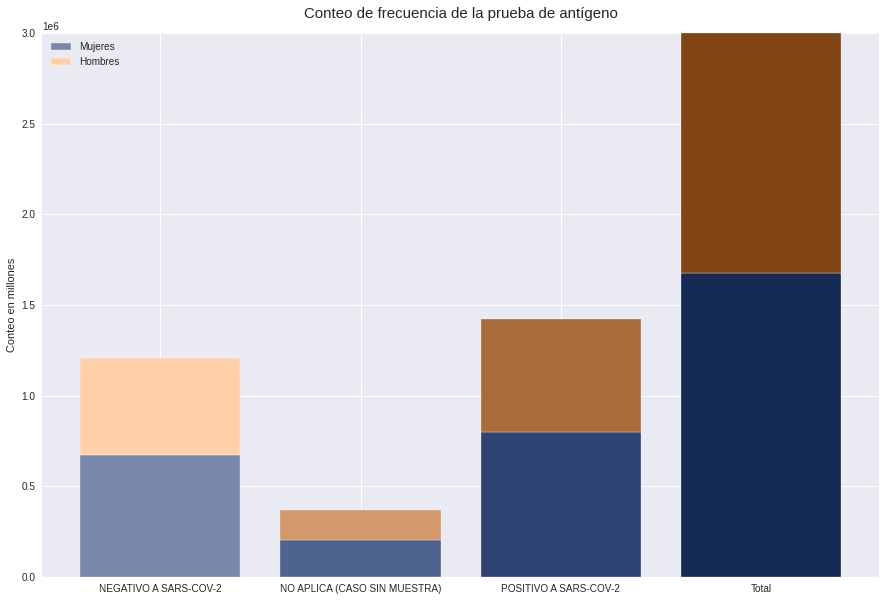

In [ ]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts['Mujer'], label='Mujer',
              color=["#7788AA","#4E638E","#2E4372","#152A55"])
plt2 = ax.bar(value_counts.index, value_counts['Hombre'], bottom=value_counts['Mujer'],
              color=["#FFD0AA", "#D4996A", "#AA6B39", "#804415"])

ax.set_ylabel('Conteo en millones')
ax.set_title('Conteo de frecuencia de la prueba de ant√≠geno', fontsize=15, pad=15);
plt.legend((plt1[0], plt2[0]), ('Mujeres', 'Hombres'));
ax.set_ylim(0, 3000000);

#Postwork 7: Pruebas A/B y Procesamiento de Lenguaje Natural
Dado que el DataSet con el que estamos trabajando del COVID no trae informaci√≥n estructurada, nos dimos a la tarea de buscar otro DataSet que nos ayude con este postwork. Dando continuidad al mismo tema se encontr√≥ un dataset relacionado con las vacunas del COVID el cual nos ayudar√° con el tema de Procesamiento de lenguaje natural.<br>
Este DataSet se encontro en el siguiente link: https://www.kaggle.com/datasets/gpreda/all-covid19-vaccines-tweets

In [ ]:
#se importan todas las bibliotecas necesarias
import nltk
from nltk.corpus import stopwords
import numpy as np
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/proyectoBedu_python/modulo4/vaccination_all_tweets.csv", low_memory=False)
df.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eliüá±üáπüá™üá∫üëå                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra üñê‚ò∫  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

Dentro de an√°lisis exploratorio de los datos, hemos identificado diferentes entradas de los tweets, por ello se ha agrupado por el "source". En el campo "text" tenemos los diferentes comentarios que los usuarios han expresado unos muy interesantes y otros no tanto.

In [ ]:
grouped_by_title = df.groupby('source')['text'].max()
grouped_by_title

source
 Xinhua Sports     Brazilian football club Atletico Mineiro will ...
24liveblog         Second shipment of #PfizerbioNTech #coronaviru...
24sante            Fast &amp; Furious 8 : tensions entre Dwayne J...
50trends Russia    [ TTs RUüá∑üá∫ 05:50 ]\n#SputnikV has entered the ...
92 News HD         Special plane carrying one million doses of Si...
                                         ...                        
vikaslatyan        #COVIDVACCINE ALERT: Sat May 29 20:07:38 2021 ...
xh_scitech         Sri Lanka's study finds #Sinopharm #COVID19 va...
zzposts            Protection from its vaccine still strong 6 mon...
–ûwly               So far I'm just tired. Could be from the heat ...
ü¶âTeleTweet         Thanks to one of the peeps for Erin RN's page ...
Name: text, Length: 379, dtype: object

Para poder continuar vamos a darle un limpieza a los datos

In [ ]:
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.replace(r'<br\s*/?>', ' ', regex=True)
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

grouped_by_title

<ipython-input-78-5efbb59ac0d5>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
<ipython-input-78-5efbb59ac0d5>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\d', '')
<ipython-input-78-5efbb59ac0d5>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\\n', '')


source
 Xinhua Sports     brazilian football club atletico mineiro will ...
24liveblog         second shipment of pfizerbiontech coronavirus ...
24sante            fast amp furious   tensions entre dwayne johns...
50trends Russia     tts ru  sputnikv has entered the top trends g...
92 News HD         special plane carrying one million doses of si...
                                         ...                        
vikaslatyan        covidvaccine alert sat may    avlb on  center ...
xh_scitech         sri lankas study finds sinopharm covid vaccine...
zzposts            protection from its vaccine still strong  mont...
–ûwly               so far im just tired could be from the heat or...
ü¶âTeleTweet         thanks to one of the peeps for erin rns page l...
Name: text, Length: 379, dtype: object

Ahora, vamos a construir un objeto Text con nuestros datos.

In [ ]:
# Con esto separaremos cada oracion en palabras
tokenized = grouped_by_title.apply(nltk.word_tokenize)
print(tokenized)

# Generamos nuestro objecto text

all_words = tokenized.sum()
text = nltk.Text(all_words)

print(text)

source
 Xinhua Sports     [brazilian, football, club, atletico, mineiro,...
24liveblog         [second, shipment, of, pfizerbiontech, coronav...
24sante            [fast, amp, furious, tensions, entre, dwayne, ...
50trends Russia    [tts, ru, sputnikv, has, entered, the, top, tr...
92 News HD         [special, plane, carrying, one, million, doses...
                                         ...                        
vikaslatyan        [covidvaccine, alert, sat, may, avlb, on, cent...
xh_scitech         [sri, lankas, study, finds, sinopharm, covid, ...
zzposts            [protection, from, its, vaccine, still, strong...
–ûwly               [so, far, im, just, tired, could, be, from, th...
ü¶âTeleTweet         [thanks, to, one, of, the, peeps, for, erin, r...
Name: text, Length: 379, dtype: object
<Text: brazilian football club atletico mineiro will receive chinas...>


Hacemos un muestreo de concordancia con respecto a la palabra **"vaccine"** dandonos varias coincidencias.

In [ ]:
text.concordance('vaccine', lines=20)

Displaying 20 of 148 matches:
mineiro will receive chinas sinovac vaccine httpstcoejydvhcoah httpstcoxvumeafn
pment of pfizerbiontech coronavirus vaccine arrives riyadh ksa second shipment 
ying one million doses of sinopharm vaccine reaches pakistan ncoc sinopharm htt
s going who certifies covid sinovac vaccine thailands current main vaccine http
ovac vaccine thailands current main vaccine httpstcoauvznrtnl covid sinovac vac
ine httpstcoauvznrtnl covid sinovac vaccine twitter trend ‡∏ã‡πÇ‡∏ô‡∏ü‡∏≤‡∏£‡∏° ‡∏°‡∏≠‡∏ö‡∏Å‡∏£‡∏Å‡∏é‡∏≤ rovd
‡∏°‡∏¢‡∏î‡∏≤‡∏£‡∏≤ algeria begins sinovac covid vaccine production africafrique httpstcodba
the johnson amp johnson coronavirus vaccine should you try to get a booster dos
 tuesday approved the sinovac covid vaccine for emergency use √¢ the second chi 
tcoahnvjpqf mrna for modernas covid vaccine to be manufactured by resilience co
nt cancel contract with problematic vaccine manufacturer live covid updates eme
ssianagent had stolen a coronavirus vaccine for

In [ ]:
text.similar('vaccine')

vaccines moderna httpstcopnstojcsox vaccination booster mrna shot
boosters needs stock pandemic specialist vaccinationthere vaccinations
says myth whether racing httpstcodoneiswe infections


In [ ]:
# Contamos con un total de 2370 palabras
len(set(text))

2370

Utilizamos FreqDist para analizar la distribuci√≥n de frecuencia de nuestras palabras, dando datos interesantes sobre "moderna", "vaccine", "covid"

In [ ]:
all_words = tokenized.sum()
freq_dist = nltk.FreqDist(all_words)
freq_dist.most_common(50)

[('the', 194),
 ('moderna', 173),
 ('vaccine', 148),
 ('covid', 140),
 ('of', 109),
 ('to', 106),
 ('in', 91),
 ('and', 86),
 ('for', 82),
 ('is', 54),
 ('pfizer', 54),
 ('a', 53),
 ('on', 50),
 ('vaccines', 37),
 ('covaxin', 33),
 ('are', 30),
 ('with', 30),
 ('at', 29),
 ('dose', 29),
 ('has', 28),
 ('who', 28),
 ('from', 28),
 ('sinovac', 27),
 ('mrna', 27),
 ('you', 25),
 ('doses', 24),
 ('sputnikv', 20),
 ('as', 20),
 ('booster', 19),
 ('that', 19),
 ('this', 19),
 ('us', 18),
 ('by', 17),
 ('covidvaccine', 16),
 ('or', 16),
 ('shot', 16),
 ('have', 16),
 ('we', 16),
 ('its', 16),
 ('about', 16),
 ('first', 16),
 ('more', 16),
 ('news', 15),
 ('be', 15),
 ('second', 14),
 ('coronavirus', 14),
 ('your', 14),
 ('now', 14),
 ('will', 13),
 ('sinopharm', 13)]

Realizamos una eliminacion de las palabras vacias

In [ ]:
english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]
freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [ ]:
freq_dist_no_stop_words.most_common(50)

[('moderna', 173),
 ('vaccine', 148),
 ('covid', 140),
 ('pfizer', 54),
 ('vaccines', 37),
 ('covaxin', 33),
 ('dose', 29),
 ('sinovac', 27),
 ('mrna', 27),
 ('doses', 24),
 ('sputnikv', 20),
 ('booster', 19),
 ('us', 18),
 ('covidvaccine', 16),
 ('shot', 16),
 ('first', 16),
 ('news', 15),
 ('second', 14),
 ('coronavirus', 14),
 ('sinopharm', 13),
 ('million', 12),
 ('people', 12),
 ('astrazeneca', 12),
 ('new', 12),
 ('one', 11),
 ('vaccination', 11),
 ('get', 11),
 ('shots', 11),
 ('health', 10),
 ('vaccinated', 10),
 ('got', 10),
 ('emergency', 9),
 ('use', 9),
 ('cdc', 9),
 ('jab', 9),
 ('uk', 9),
 ('effective', 9),
 ('via', 8),
 ('today', 8),
 ('st', 8),
 ('sputnik', 8),
 ('may', 8),
 ('still', 8),
 ('amp', 7),
 ('top', 7),
 ('advisory', 7),
 ('months', 7),
 ('city', 7),
 ('fda', 7),
 ('study', 7)]

Se genera una gr√°fica de barras donde identificamos que la vacuna moderna es la que a ten√≠a m√°s menci√≥n dentro de los tweet.

In [ ]:
#Se obtienen las 50 palabras mas comunes y se genera una grafica
df_50mostcommon = pd.DataFrame(freq_dist_no_stop_words.most_common(20))
df_50mostcommon.columns = ["word","freq"]

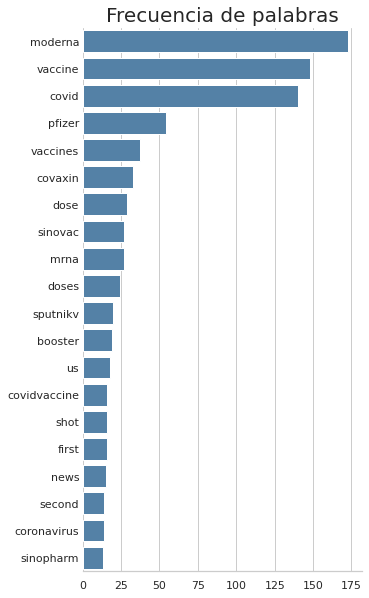

In [ ]:
# Grafica de barras horizontales (Usando Matplotlib)
fig,ax = plt.subplots(figsize = (5,10))

sns.barplot(data = df_50mostcommon, x = "freq", y = "word", color = "steelblue", ax = ax)
ax.tick_params(axis="y", length = 0)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Frecuencia de palabras", size = 20)
sns.despine(left=True)

Dando un resulado en porcentajes de aparici√≥n para la palabra moderna y vaccine.


In [ ]:
# Conteo de una palabra y porcentaje de aparici√≥n
print(f'{(100 * freq_dist_no_stop_words["moderna"] / len(all_words_except_stop_words)):.3f}%')
print(f'{(100 * freq_dist_no_stop_words["vaccine"] / len(all_words_except_stop_words)):.3f}%')

4.177%
3.573%


Mostramos la gr√°fica de acumulados y veamos qu√© proporci√≥n del text est√° siendo ocupada por las 50 palabras m√°s comunes

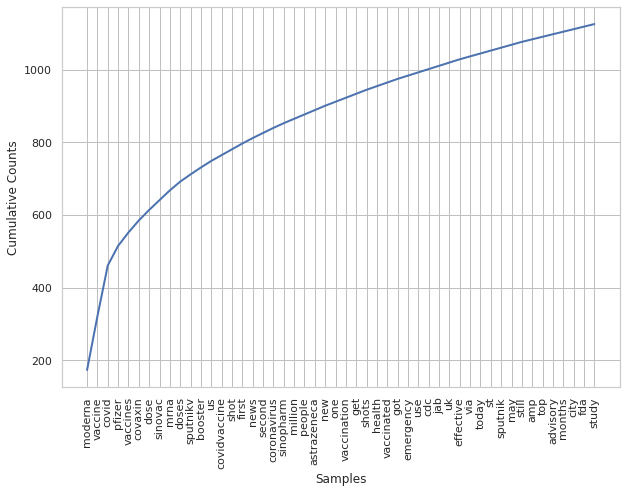

In [ ]:
fig = plt.figure(figsize=(10, 7))
freq_dist_no_stop_words.plot(50, cumulative=True);

Visualizamos las palabras de que mencionan solo una vez

In [ ]:
freq_dist_no_stop_words.hapaxes()[:20]

['brazilian',
 'football',
 'atletico',
 'mineiro',
 'httpstcoejydvhcoah',
 'httpstcoxvumeafnv',
 'ksa',
 'pf',
 'httpstcohocwwnd',
 'fast',
 'furious',
 'tensions',
 'entre',
 'dwayne',
 'vin',
 'diesel',
 'httpstcovrpglqqur',
 'tts',
 'ru',
 'entered']

Realizamos nuestra nubes de palabras y se observa que tantos algunas vacunas como la moderna o pfizer son de las comunes dentro de los intereses de las personas, asi como tambi√©n la importancia que han tenido el estudio de vacunas para poder contener esta emfermedad.

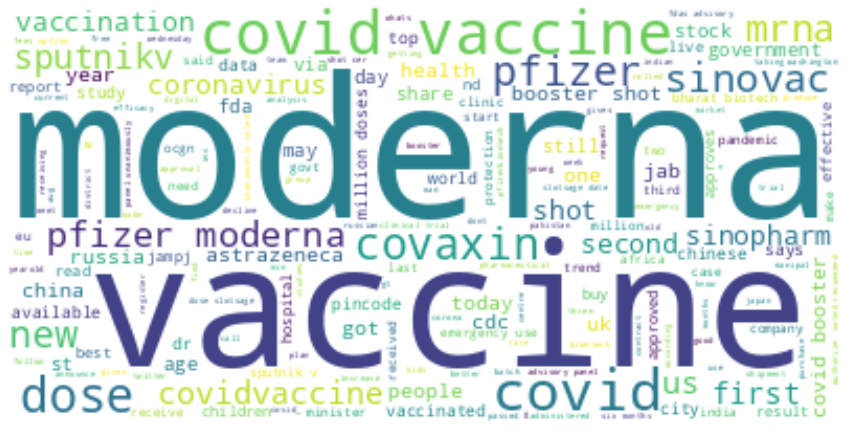

In [ ]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Postwork 8: Introducci√≥n a Machine Learning: Clasificaci√≥n No Supervisada y Supervisada
Usaremos el algoritmo de clasificacion Supervisado es decir la Regresion Logistica para intentar "predecir" con ella y con los datos que tenemos si un paciente sobrevivira o no. Nuestra variable binaria la sacaremos del registro Fecha de defuncion. 

Procedemos con la importaci√≥n de las librer√≠as necesarias.

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

Limpiaremos nuestro dataframe y puesto que no tenemos una columna de sobreviviente o no, lo intuimos de la columna de fecha de defuncion, quitaremos todos los registros que no tengan los datos completos y solo nos quedaremos con los pacientes infectados con covid.

In [ ]:
df_covid = df.query("CLASIFICACION_FINAL==1 | CLASIFICACION_FINAL==2 | CLASIFICACION_FINAL==3")[['FECHA_DEF', 'NEUMONIA', 'EDAD', 'DIABETES',
                                                                                                 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 
                                                                                                 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
                                                                                                 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO']]

In [ ]:
df_covid_final = df_covid.query("NEUMONIA!=98 & DIABETES!=98 & EPOC!=98 & ASMA!=98 & INMUSUPR!=98 & HIPERTENSION!=98 & OTRA_COM!=98 & CARDIOVASCULAR!=98 & OBESIDAD!=98 & RENAL_CRONICA!=98 & TABAQUISMO!=98 & OTRO_CASO!=98")

Revisamos que solo tengamos los campos que necesitamos.

In [ ]:
df_covid_final.columns

Index(['FECHA_DEF', 'NEUMONIA', 'EDAD', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO'],
      dtype='object')

Del campo que queremos convertir a binario identificamos como haremos la conversi√≥n, en este caso de los registros '9999-99-99' intuimos que son personas sin fecha de defunci√≥n y las identificamos como sobrevivientes con el identificador 1 y los que fallecieron es decir lo que tengan fecha de defunci√≥n como 0.

In [ ]:
df_covid_final['FECHA_DEF'].unique()

array(['9999-99-99', '2022-02-21', '2022-01-12', '2022-01-03',
       '2022-01-04', '2022-01-26', '2022-01-08', '2022-02-16',
       '2022-01-11', '2022-01-10', '2022-01-02', '2022-01-13',
       '2022-01-09', '2022-01-07', '2022-01-05', '2022-01-18',
       '2022-01-06', '2022-01-23', '2022-01-14', '2022-01-20',
       '2022-01-16', '2022-01-25', '2022-01-01', '2022-01-19',
       '2022-01-22', '2022-02-02', '2022-01-31', '2022-02-01',
       '2022-01-17', '2022-01-27', '2022-01-29', '2022-01-15',
       '2022-01-24', '2022-01-21', '2022-01-30', '2022-01-28',
       '2022-02-13', '2022-02-11', '2022-02-09', '2022-02-05',
       '2022-02-03', '2022-02-06', '2022-03-04', '2022-02-04',
       '2022-02-07', '2022-02-08', '2023-01-13', '2022-02-15',
       '2022-02-12', '2022-02-22', '2022-03-18', '2022-03-08',
       '2022-02-19', '2022-03-13', '2022-02-20', '2022-02-14',
       '2022-02-23', '2022-02-10', '2022-02-26', '2022-03-05',
       '2022-04-02', '2022-03-09', '2022-03-01', '2022-

In [ ]:
df_covid_final['FECHA_DEF'] = df_covid_final['FECHA_DEF'].apply(lambda x: 1 if x == '9999-99-99' else 0)

<ipython-input-9-be7cf5078358>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_final['FECHA_DEF'] = df_covid_final['FECHA_DEF'].apply(lambda x: 1 if x == '9999-99-99' else 0)


Cambiamos el Titulo de la columna por simple coherencia de los datos

In [ ]:
df_covid_final.set_axis(['SOBREVIVIENTE', 'NEUMONIA', 'EDAD', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
                         'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
                         'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO'], axis='columns', inplace=True)
df_covid_final.head()

SOBREVIVIENTE  NEUMONIA  EDAD  DIABETES  EPOC  ASMA  INMUSUPR  \
7               1         2    58         2     2     2         2   
15              1         2    34         2     2     2         2   
20              1         2    24         2     2     1         2   
22              0         1    54         2     2     2         2   
27              1         2    39         2     2     2         2   

    HIPERTENSION  OTRA_COM  CARDIOVASCULAR  OBESIDAD  RENAL_CRONICA  \
7              2         2               2         2              2   
15             2         2               2         2              2   
20             2         2               2         2              2   
22             1         2               2         2              1   
27             2         2               2         2              2   

    TABAQUISMO  OTRO_CASO  
7            2          2  
15           2          1  
20           2          2  
22           2          2  
27           2          2

Vemos de los registros con los que vamos a trabajar

In [ ]:
df_covid_final.shape

(1626800, 14)

Dividimos nuestro data frame, separando la columna con variable binaria que ser√° nuestro resultado como Y y el resto de los campos como X

In [ ]:
X = df_covid_final.drop(columns=['SOBREVIVIENTE'])
y = df_covid_final['SOBREVIVIENTE']

Llamamos a la funci√≥n de regresion logar√≠tmica y definimos el maximo de iteraciones con las que se entrenar√° el algoritmo

In [ ]:
logreg = LogisticRegression(max_iter=100000)

Dividimos nuestros registros en una proporci√≥n de 70/30 para que se entrene nuestro modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Lo entrenamos...

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

Obtenemos nuestra matriz de predicci√≥n, probando el modelo con el 30% de los datos restantes.

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
logreg.score(X_test, y_test)

0.9888759118105074

Al calificar nuestro modelo vemos que obtuvo una calificaci√≥n Muy aceptable pero falta verificar si nuestro modelo aparte de "predecir" si el paciente sobrevivir√≠a queremos ver si tambi√©n logra hacerlo al clasificarlo c√≥mo que fallecer√°, para eso procedemos con un analizis m√°s profundo con la Matriz de confusi√≥n y posteriormente con la gr√°fica de ROC/AUC

###**Matriz de confusi√≥n**
Obtenemos nuestra matriz de confusi√≥n comparando las clasificaci√≥nes predecidas por el modelo con las reales

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[  2067,   3885],
       [  1544, 480544]])

Graficamos nuestra Matriz y confirmamos que en efecto el n√∫mero de registros clasificados correctamente somos sobrevivientes es muy alto pero el de fallecidos es notablemente muy bajo.

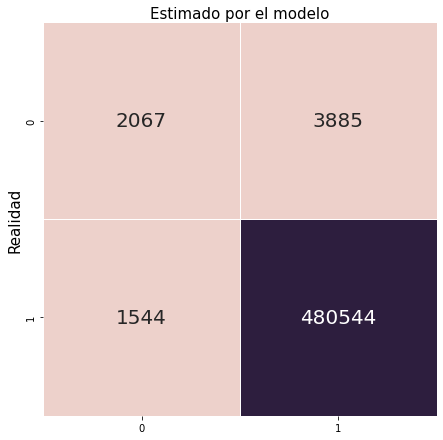

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=sns.cubehelix_palette(as_cmap=True) ,fmt='g', cbar=False, annot_kws={"size": 20},  linewidth=.5)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Obtenemos las m√©tricas de precisi√≥n, exactitud, sensibilidad y espec√≠ficidad del modelo, para confirmar que clasifica bien los que van a sobrevivir o muy mal los que van a fallecer...

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred),"% de las predicciones eran en realidad positivas")
print("Exactitud:",metrics.accuracy_score(y_test, y_pred),"% de las predicciones fueron clasificadas correctamente")
print("Sensibilidad:",metrics.recall_score(y_test, y_pred),"% de las predicciones fueron clasificadas correctamente como positivas")
print("Especificidad:", tn / (tn + fp),"% de las predicciones fueron clasificadas correctamente como negativas")

Precision: 0.9919802489116052 % de las predicciones eran en realidad positivas
Exactitud: 0.9888759118105074 % de las predicciones fueron clasificadas correctamente
Sensibilidad: 0.9967972652295847 % de las predicciones fueron clasificadas correctamente como positivas
Especificidad: 0.3472782258064516 % de las predicciones fueron clasificadas correctamente como negativas


###**Curva ROC / AUC**
Ahora graficamos la sensibilidad que tiene el modelo en verdaderos positivos y falsos positivos y de antemano sabemos por la matriz de confusi√≥n que nuestro modelo predice bien positivamente pero no negativamente. Obtenemos las probabilidades de positivos y negativos

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[5.23825329e-04, 9.99476175e-01],
       [6.61991382e-04, 9.99338009e-01],
       [5.66339232e-04, 9.99433661e-01],
       [7.99338200e-03, 9.92006618e-01],
       [1.05713960e-03, 9.98942860e-01],
       [5.50184036e-03, 9.94498160e-01],
       [4.84501308e-04, 9.99515499e-01],
       [1.33578654e-03, 9.98664213e-01],
       [5.23825329e-04, 9.99476175e-01],
       [2.13227058e-03, 9.97867729e-01]])

Obtenemos los valores de nuestra gr√°fica y posteriormente graficamos

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

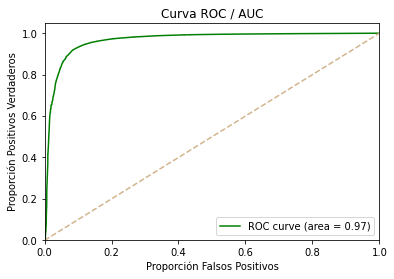

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='green',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='tan', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporci√≥n Falsos Positivos')
plt.ylabel('Proporci√≥n Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

###Conclusi√≥n
Con esto obtenemos que nuestro modelo clasifica altamente correcto cuando el paciente sobrevivir√° pero muy mal cuando clasifica si est√© fallecer√°.

En interpretaci√≥n a nuestro caso de estudio podemos deducir con este modelo que los campos elegidos para encontrar un patron son las enfermedades adicionales al Covid los cuales podr√≠an complicar la recuperaci√≥n del paciente, al menos con el dataset mayoritariamente categorico que tenemos no podemos predecir si nuestro paciente morir√°, intuimos que si los registro de cada enfermadad fueran datos num√©ricos, en donde se diera una metrica de sus estudios clinicos de cada enfermedad o los niveles de anticuerpos que tiene el paciente, el modelo podr√≠a funcionar mejor.

#Conclusiones
Ahora que hemos estudiado diferentes temas sobre an√°lisis de datos encaminados hacia la aplicaci√≥n de Machine Learning, nos hemos dado cuenta que para realizar an√°lisis profundos, manipulaci√≥n, transformaci√≥n y extracci√≥n de informaci√≥n de bases de datos que respondan a preguntas de problemas reales, requerimos de un dataset que est√© bien estructurado de tal manera que tenga varias variables num√©ricas y otras categ√≥ricas y as√≠ obtener insights y generar m√∫ltiples visualizaciones que permitan comunicar diferentes conclusiones sobre la naturaleza y comportamiento de los datos.<br><br>
En nuestro caso, el dataset elegido en el m√≥dulo pasado, casi todas las variables eran categ√≥ricas, por lo que tuvimos que aplicar agrupaciones y obtener subconjuntos de tal manera que se adaptaran a las necesidades de los ejercicios, a pesar de las complicaciones, logramos aplicar los temas aprendidos durante el m√≥dulo.

